# **Walmart - Confidence Interval and CLT**


## **Introduction**

### About Walmart

<img src="https://www.computerworld.com/wp-content/uploads/2024/03/walmart2-logo-100819681-orig.jpg?quality=50&strip=all">
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### Problem Statement

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Goal

**The aim of this project is to find out the purchase behaviour of male and female customers to help the business make better decisions.**

### Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

    User_ID: User ID
    Product_ID: Product ID
    Gender: Sex of User
    Age: Age in bins
    Occupation: Occupation(Masked)
    City_Category: Category of the City (A,B,C)
    Stay_In_Current_City_Years: Number of years stay in current city
    Marital_Status: Marital Status
    Product_Category: Product Category (Masked)
    Purchase: Purchase Amount

## **Importing the required libraries for the analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.stats import norm, binom

import warnings
warnings.filterwarnings('ignore')

## **Importing the Dataset**

In [2]:
!gdown 1GLBY_aR_u4HI7ycpCrr2CNHA-RMjuo8K

Downloading...
From: https://drive.google.com/uc?id=1GLBY_aR_u4HI7ycpCrr2CNHA-RMjuo8K
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 63.3MB/s]


## **Basic Analysis : Getting to know the dataset**

In [3]:
(df := pd.read_csv("walmart_data.csv"))

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]

In [4]:
df.shape

(550068, 10)

*The shape of the dataset is* ***550068x10***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

*Here we can confirm that the dataset consist of no null values since all the columns have 550068 non-null values.*

In [7]:
np.any(df.duplicated())

False

*We can thus confirm that the dataset contains no duplicate records as well.*

### _Converting the necessary columns to 'categorical' ones_

Let us have a look at the dataset to have a depper understanding about the type of data.

In [8]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [10]:
# Value counts of columns with 'object' data types

for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts(),'\n',sep="\n")

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64


Gender
M    414259
F    135809
Name: count, dtype: int64


Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64


City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64


Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64




We can thus derive that, having over 3600+ unique product IDs, the product ID cannot be treated to be of the categorical nature.
Thus, except the 'Product ID' column, all other columns can be marked to be of the categorical type.

In [11]:
cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
df[cat_cols] = df[cat_cols].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int64(5), object(1)
memory usage: 27.3+ MB


We shall also examine the data in the 'Marital_Status', 'Product_Category' & the 'Occupation' columns.

In [13]:
for col in ['Marital_Status', 'Product_Category', 'Occupation']:
  print(df[col].value_counts(), 'Number of Unique ' + col + ' : '+ str(df[col].nunique()),'\n',sep = '\n')

Marital_Status
0    324731
1    225337
Name: count, dtype: int64
Number of Unique Marital_Status : 2


Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64
Number of Unique Product_Category : 20


Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64
Number of Unique Occupation : 21




These columns have their original values masked as integer values and hence can also be treated as Categorical variables.

In [14]:
for col in ['Marital_Status', 'Product_Category', 'Occupation']:
  cat_cols.append(col)

In [15]:
df[cat_cols] = df[cat_cols].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


The conversion of these variables to 'category' has benefited us by 61.19% reduction in the size of the dataset. We can see that it has shrunk from the original 42.0 MB to just 16.3 MB.

### *Color Palettes*

In [17]:
# Creating few color pallettes of choice

colplts = [
    ['#582F0E','#7F4F24','#936639','#A68A64','#B6AD90','#C2C5AA','#A4AC86','#656D4A','#414833','#333D29'],
    ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6"],
    ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"],
    ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"],
    ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"],
    ["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"],
    ["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#dedad2", "#e4bcad", "#df979e", "#d7658b", "#c80064"],
    ["#e27c7c", "#a86464", "#6d4b4b", "#503f3f", "#333333", "#3c4e4b", "#466964", "#599e94", "#6cd4c5"]
           ]

## **Visual Analysis - Univariate & Bivariate**

### *Univariate Graphical Analysis*

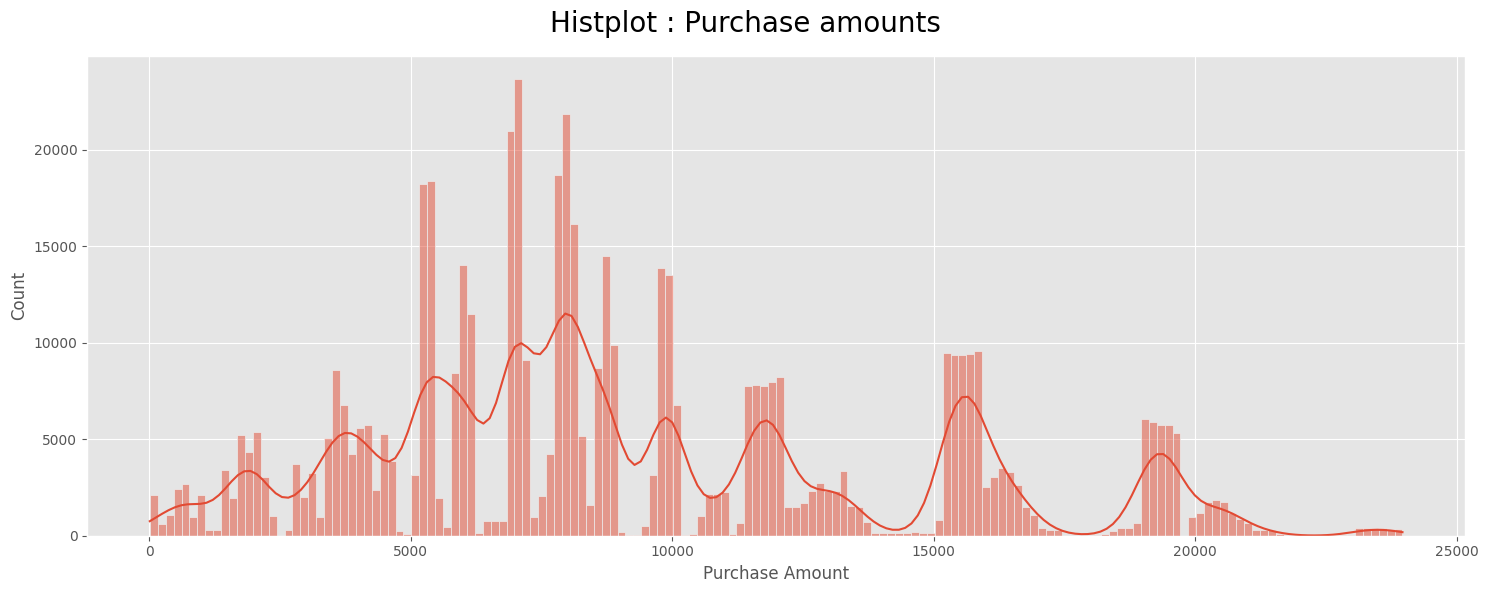

In [18]:
with plt.style.context('ggplot'):
  plt.figure(figsize=(15, 6))
  sns.histplot(data=df, x='Purchase', kde=True)
  plt.xlabel("Purchase Amount")
  plt.suptitle('Histplot : Purchase amounts', size = 20)
  plt.tight_layout()
  plt.show()

**Insights :**
- Heavy volumes of transactions are observed in the range of 5000 to 10000 USD.

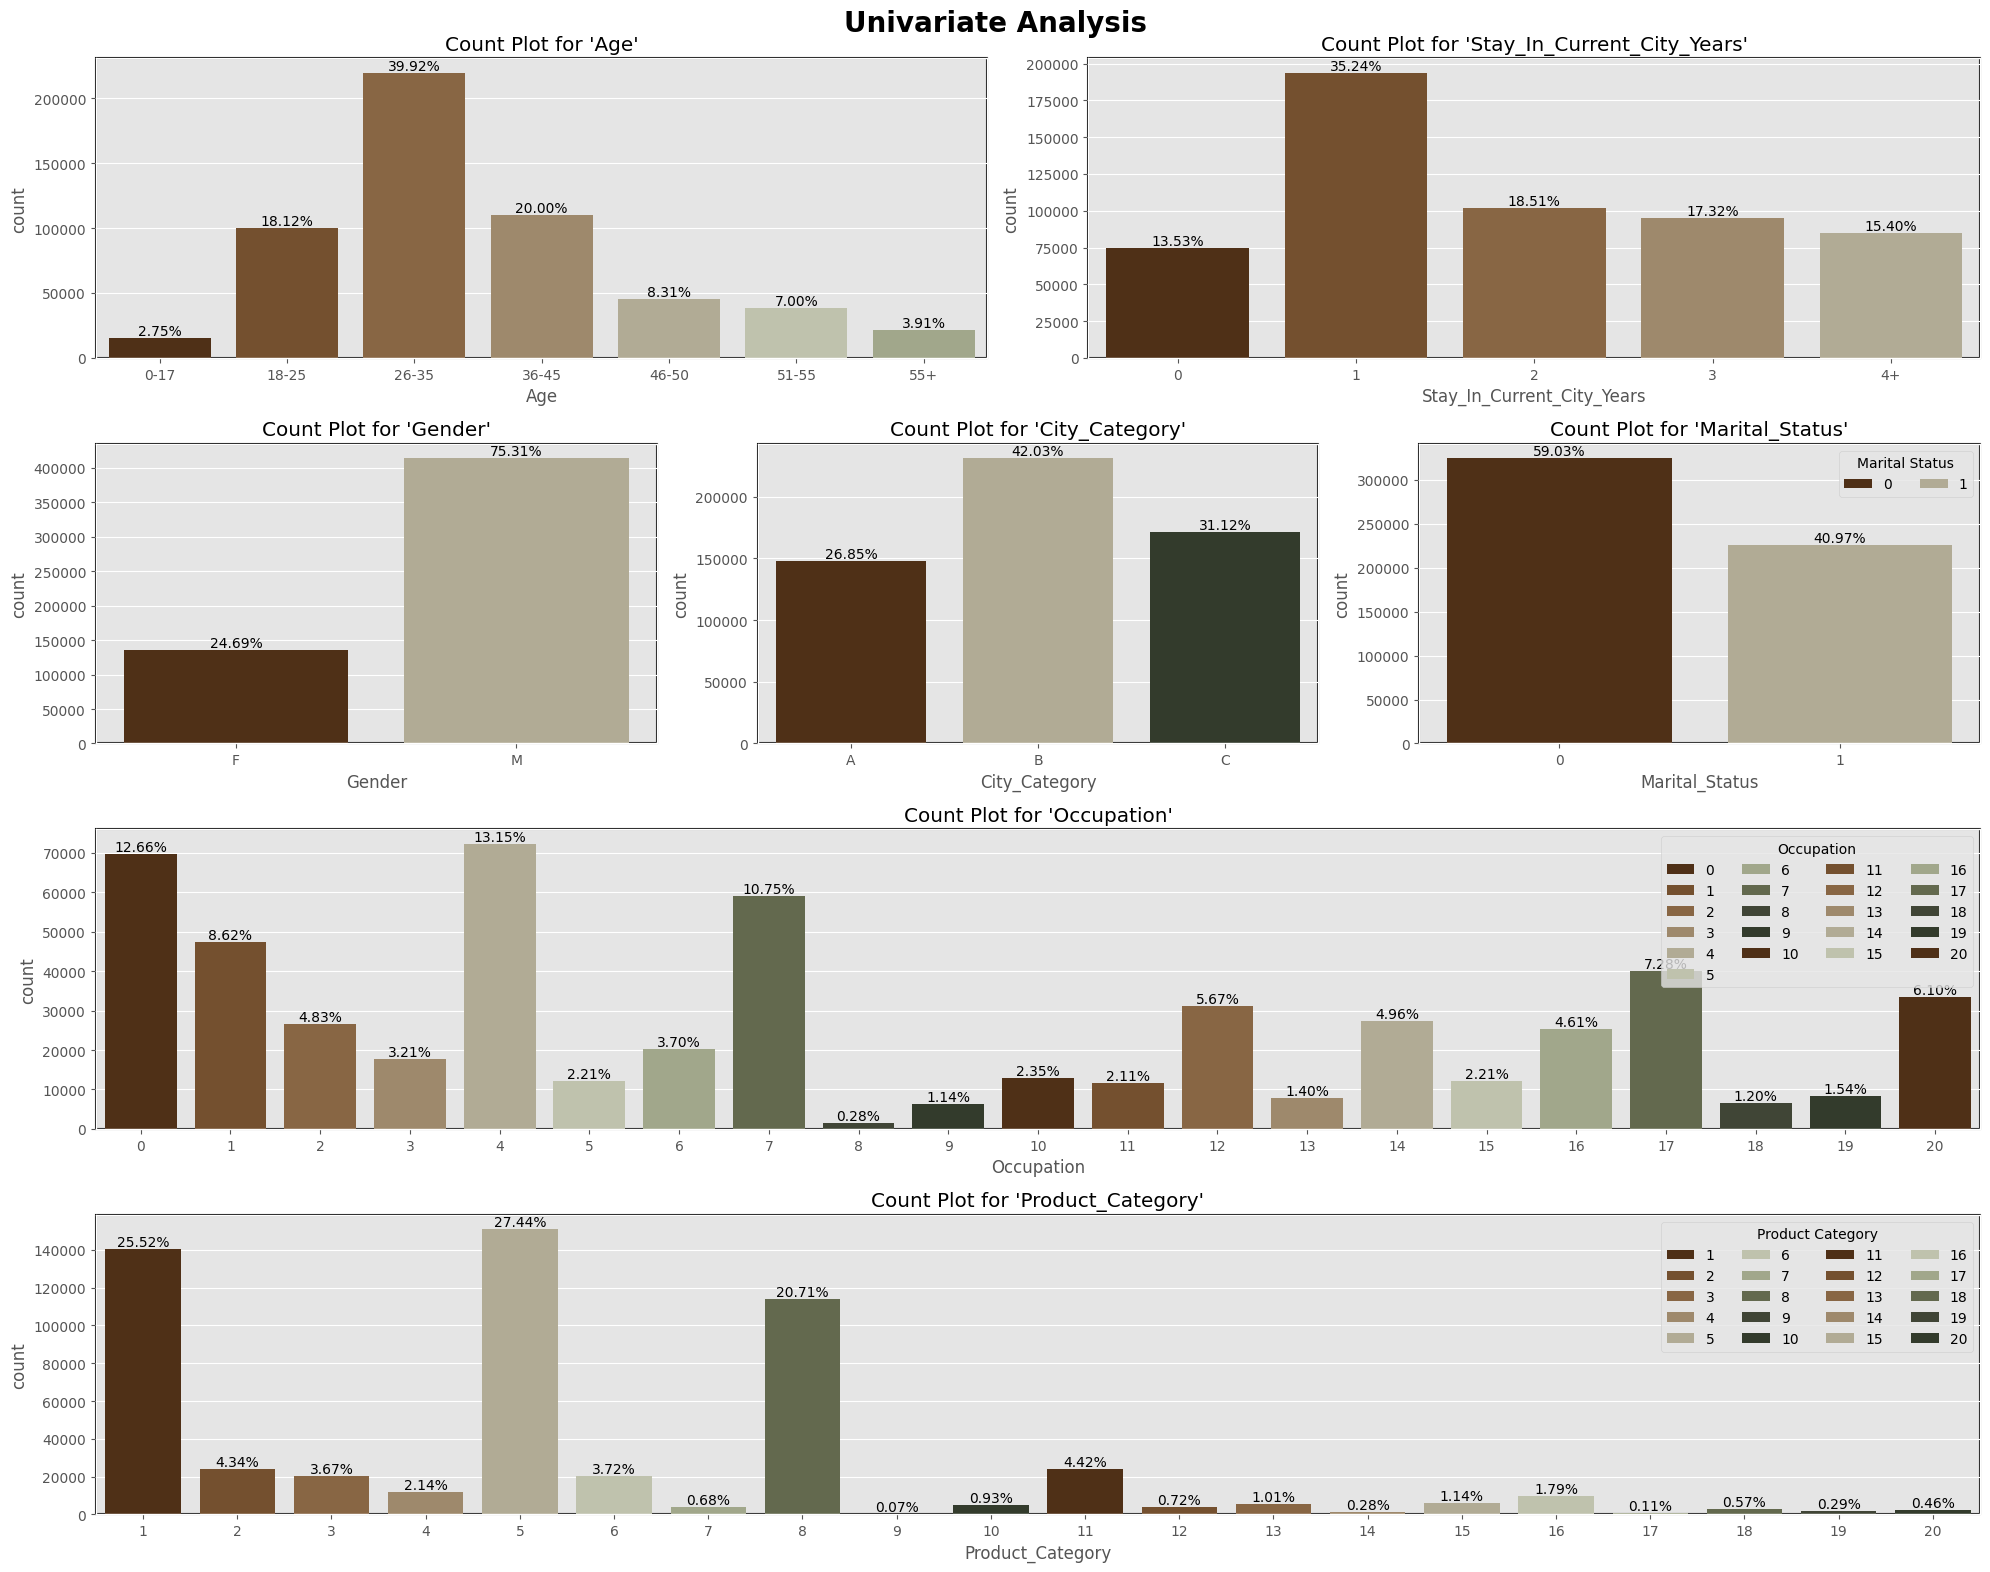

In [19]:
with plt.style.context('ggplot'):
  # Create a figure with a custom grid
  fig = plt.figure(figsize=(20, 16))
  gs = GridSpec(4, 6, figure=fig)

  # Create subplots
  ax1 = fig.add_subplot(gs[0, :3])  # Top-left
  ax2 = fig.add_subplot(gs[0, 3:])  # Top-right
  ax3 = fig.add_subplot(gs[1, :2])  # Middle-left
  ax4 = fig.add_subplot(gs[1, 2:4])  # Middle-center
  ax5 = fig.add_subplot(gs[1, 4:])  # Middle-right
  ax6 = fig.add_subplot(gs[2, :])  # Penultimate
  ax7 = fig.add_subplot(gs[3, :])  # Bottom

  # Creating countplots for different categorical variables

  sns.countplot(data = df, x = 'Age', hue = 'Age', palette = colplts[0], ax = ax1)
  ax1.set_title("Count Plot for 'Age'")

  sns.countplot(data = df, x = 'Stay_In_Current_City_Years', hue = 'Stay_In_Current_City_Years', palette = colplts[0], ax = ax2)
  ax2.set_title("Count Plot for 'Stay_In_Current_City_Years'")

  sns.countplot(data = df, x = 'Gender', hue = 'Gender', palette = ['#582F0E','#B6AD90'], ax = ax3)
  ax3.set_title("Count Plot for 'Gender'")

  sns.countplot(data = df, x = 'City_Category', hue = 'City_Category', palette = ['#582F0E','#B6AD90','#333D29',], ax = ax4)
  ax4.set_title("Count Plot for 'City_Category'")

  sns.countplot(data = df, x = 'Marital_Status', hue = 'Marital_Status', palette = ['#582F0E','#B6AD90'], ax = ax5)
  ax5.set_title("Count Plot for 'Marital_Status'")
  ax5.legend(ncol = 2, loc = 'upper right', title = 'Marital Status')

  sns.countplot(data = df, x = 'Occupation', hue = 'Occupation', palette = colplts[0], ax = ax6)
  ax6.set_title("Count Plot for 'Occupation'")
  ax6.legend(ncol = 4, loc = 'upper right', title = 'Occupation')

  sns.countplot(data = df, x = 'Product_Category', hue = 'Product_Category', palette = colplts[0], ax = ax7)
  ax7.set_title("Count Plot for 'Product_Category'")
  ax7.legend(ncol = 4, loc = 'upper right', title = 'Product Category')

  # Labelling the bars with their percentage shares

  for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.patch.set_edgecolor('black')  # Set edge color
    ax.patch.set_linewidth(1.5)        # Set line width
    for bars in ax.containers:
      labels = [f'{(bar.get_height() / len(df)) * 100:.2f}%' for bar in bars]
      ax.bar_label(bars, labels = labels)


  plt.suptitle('Univariate Analysis', weight = 'bold', size = 20)
  plt.tight_layout()
  plt.show()

**Insights :**

- Males account for 75% while Females account for roughly 25% of the shoppers in all at Walmart.
- The ratio of Bachelor's (Marital Status = 0) to Married (Marital Status = 1) shoppers at Walmart is approximately 60:40.
- The products from the categories 1, 5 and 8 are the ones that are the most sold products at Walmart, accounting for around 73.67% of Walmart's sales.
- People aged between 26-35 shop the most, making up for almost 40% of them all.- Most people that shop at Walmart live in City category 'B'.


### *Bivariate Graphical Analysis*

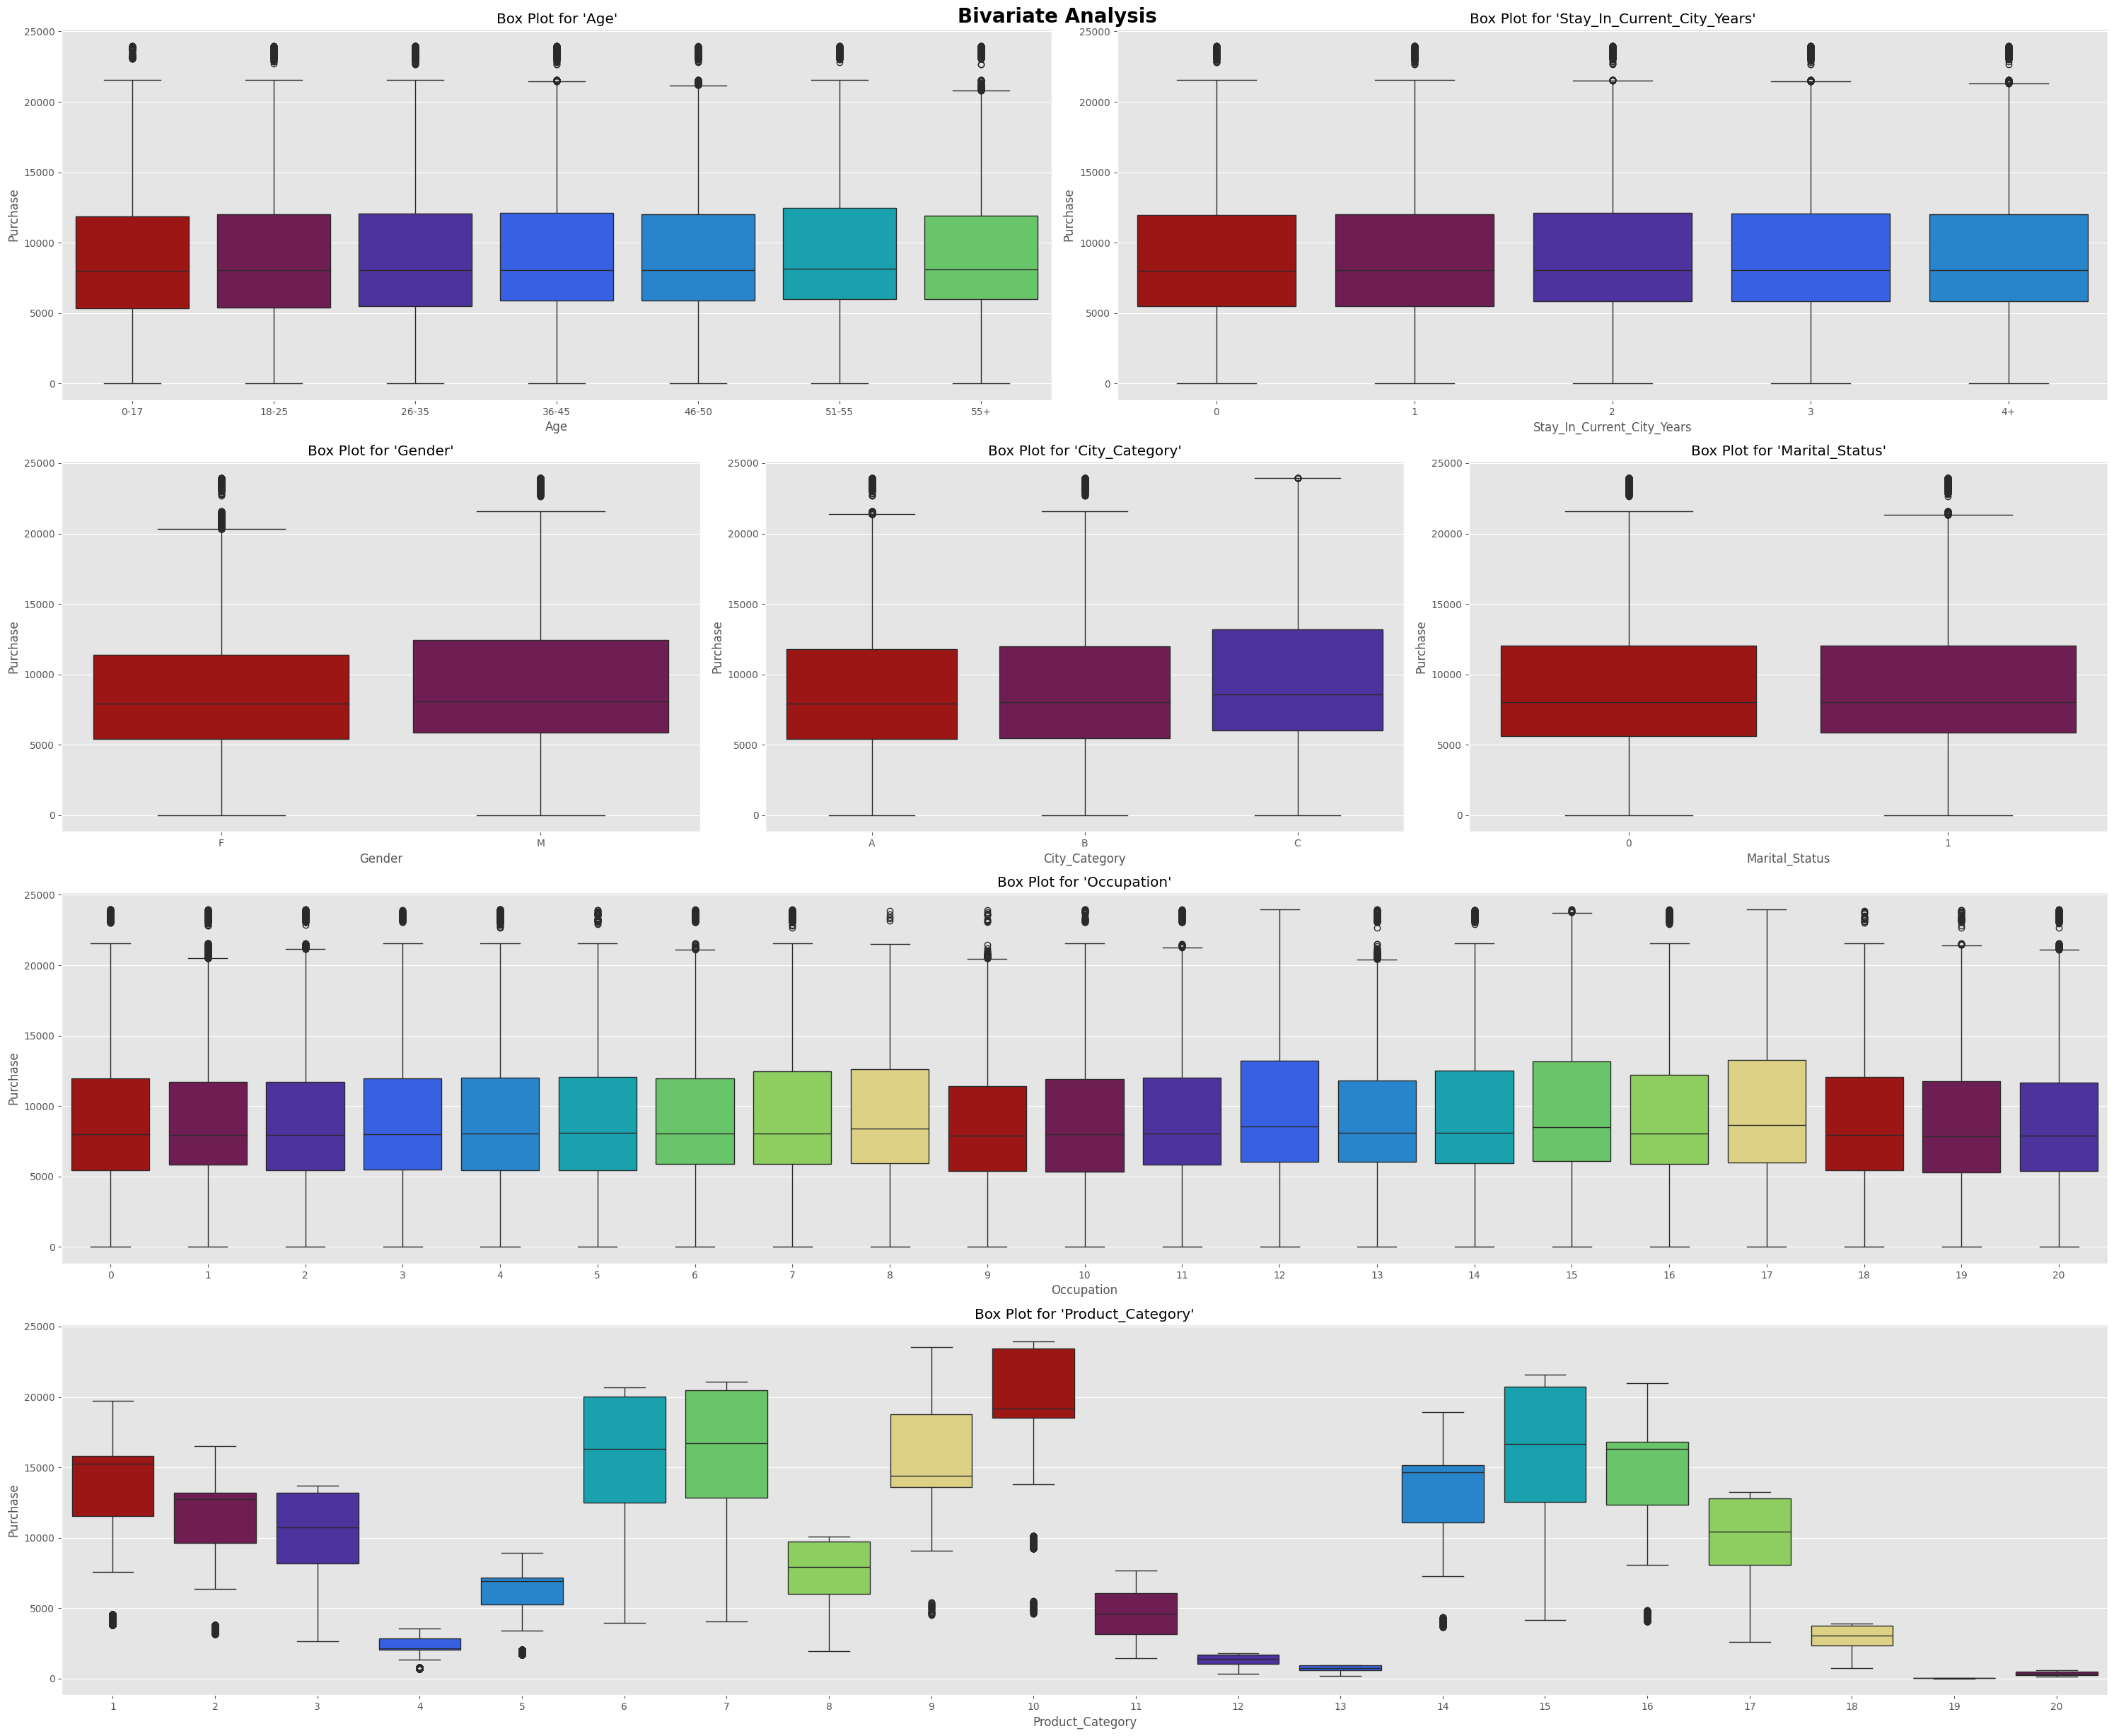

In [20]:
attrs = ['Age', 'Stay_In_Current_City_Years', 'Gender', 'City_Category', 'Marital_Status', 'Occupation', 'Product_Category']

with plt.style.context("ggplot"):
  # Create a figure with a custom grid
  fig = plt.figure(figsize=(30, 25))
  gs = GridSpec(4, 6, figure=fig)

  # Create subplots
  ax1 = fig.add_subplot(gs[0, :3])  # Top-left
  ax2 = fig.add_subplot(gs[0, 3:])  # Top-right
  ax3 = fig.add_subplot(gs[1, :2])  # Middle-left
  ax4 = fig.add_subplot(gs[1, 2:4])  # Middle-center
  ax5 = fig.add_subplot(gs[1, 4:])  # Middle-right
  ax6 = fig.add_subplot(gs[2, :])  # Penultimate
  ax7 = fig.add_subplot(gs[3, :])  # Bottom

  spaces = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

  for col, space in zip(attrs, spaces):
    sns.boxplot(data = df, y = 'Purchase', x = col, ax = space, palette = colplts[3])
    space.set_title(f"Box Plot for '{col}'", weight = 'book')

  plt.suptitle('Bivariate Analysis', weight = 'bold', size = 20)
  plt.tight_layout()
  plt.show()

### ***Most purchased products by different Age categories***

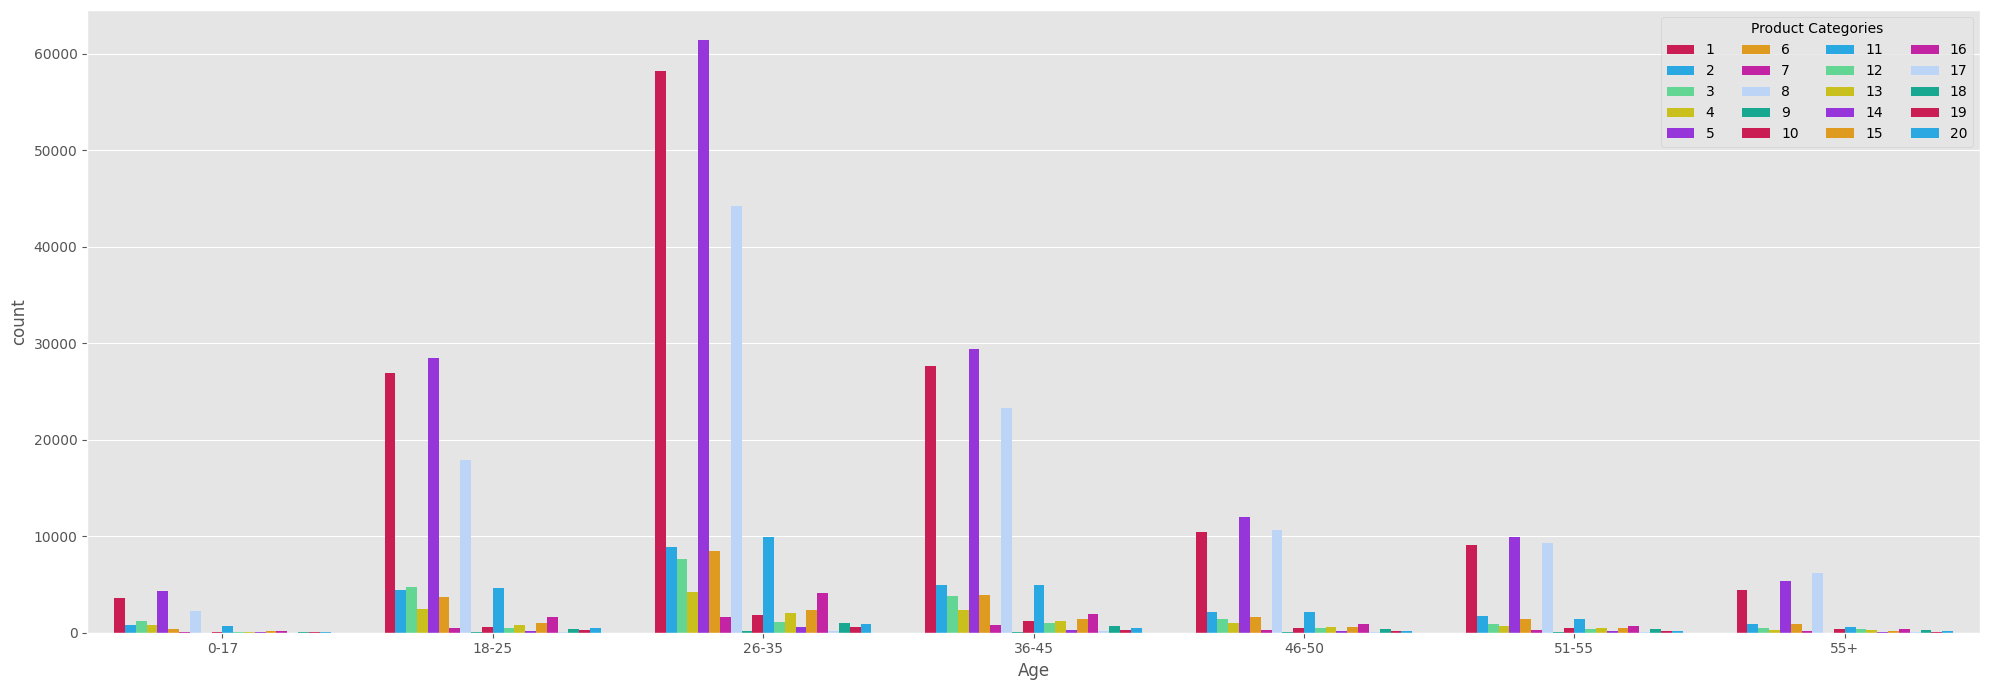

In [21]:
# First, analysing the most purchased product_categories by different Age categories

with plt.style.context('ggplot'):
  plt.figure(figsize = (20,7))
  ax = sns.countplot(data = df, x = 'Age', hue = 'Product_Category', palette = colplts[2])
  ax.legend(ncol = 4, title = 'Product Categories')
  plt.tight_layout()
  plt.show()

*It is very clearly visible from the above chart that, regardless of the age group, most sales for any group come from the Product Categories : 1, 5 & 8 together.*

*Therefore, let us further analyse the product categories to find the most sold product within each of those 3 categories among every age group.*

In [22]:
df_copy = df.copy()
df_copy = df_copy.groupby(['Age', 'Product_Category', 'Product_ID']).aggregate({'User_ID': 'count'}).reset_index()

# Rename the count column for clarity
df_copy = df_copy.rename(columns={'User_ID': 'count'})

# Sort by 'Age', 'Product_Category', and 'count' within each group
df_copy = df_copy.sort_values(['Age', 'Product_Category', 'count'], ascending=[True, True, False])

# Select the top 3 records within each 'Age' and 'Product_Category' group
df_top = df_copy.groupby(['Age', 'Product_Category']).head(1)

df_top = df_top[df_top['Product_Category'].isin([1,5,8])].reset_index(drop = True)
df_top['Product_ID'] = df_top['Product_ID'].astype('category')
df_top

Age Product_Category Product_ID  count
0    0-17                1  P00145042     64
1    0-17                5  P00034742     56
2    0-17                8  P00157542     37
3   18-25                1  P00112142    338
4   18-25                5  P00265242    389
5   18-25                8  P00058042    256
6   26-35                1  P00110742    634
7   26-35                5  P00265242    746
8   26-35                8  P00058042    595
9   36-45                1  P00025442    356
10  36-45                5  P00265242    322
11  36-45                8  P00058042    283
12  46-50                1  P00046742    130
13  46-50                5  P00265242    138
14  46-50                8  P00051442    122
15  51-55                1  P00025442    118
16  51-55                5  P00265242    140
17  51-55                8  P00086442    101
18    55+                1  P00080342     80
19    55+                5  P00265242    104
20    55+                8  P00051442     79

*We have now built a dataframe that shows the product with the highest number of sales in each of the 3 categories we already discovered from the plot drawn above and for every age group there is.*

*Let us now draw a plot showing the top product purchased in the categories 1, 5 and 8 for all the age groups.*


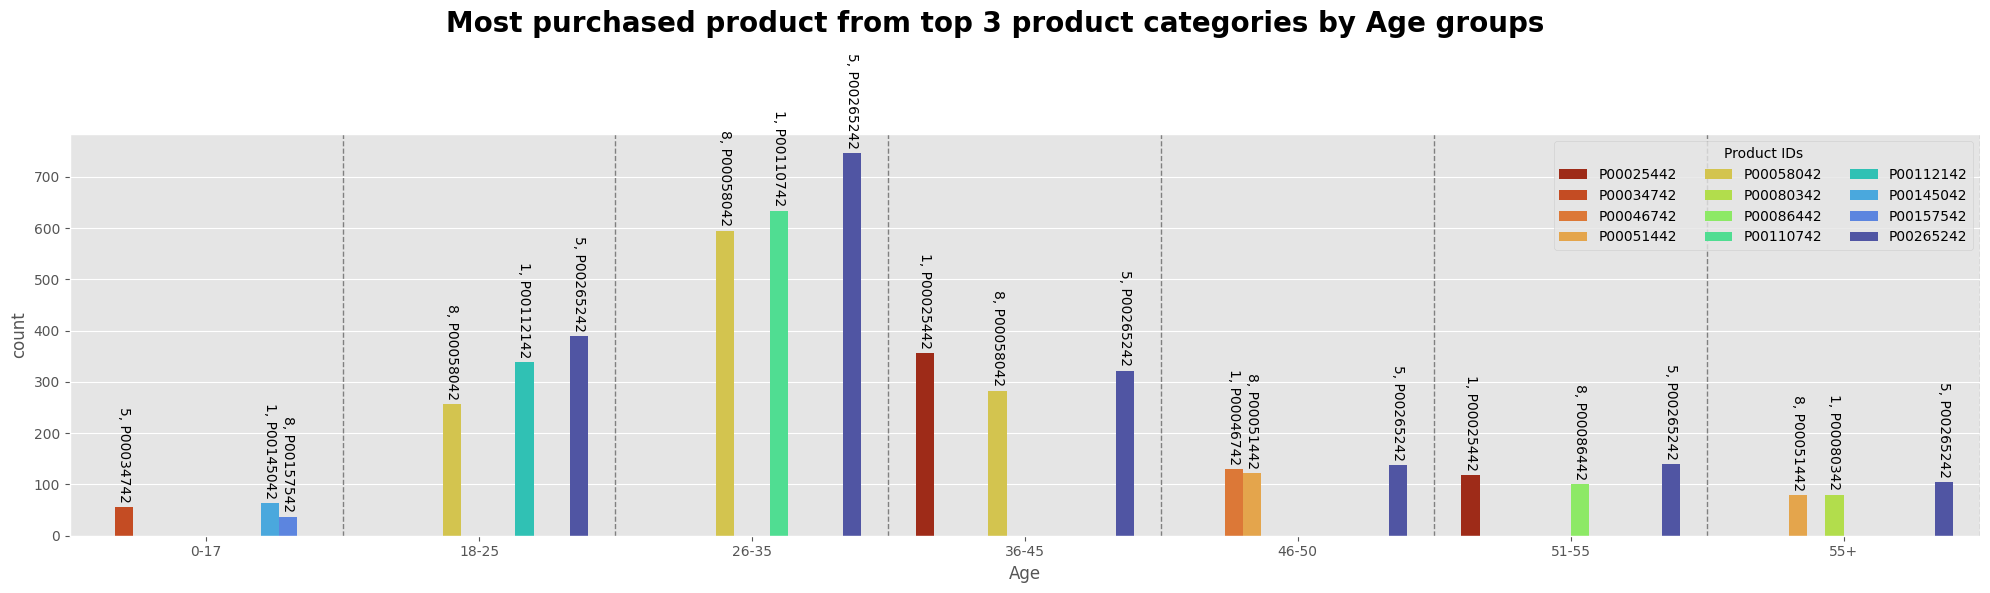

In [23]:
with plt.style.context('ggplot'):
  plt.figure(figsize = (20,6))
  ax = sns.barplot(data = df_top, x = 'Age', y = 'count', hue = 'Product_ID', palette = 'turbo_r')

  handles, labels = ax.get_legend_handles_labels()

  # Create a mapping of Product_ID to the corresponding Product_Category
  product_category_mapping = dict(zip(df_top['Product_ID'], df_top['Product_Category']))

  # Add labels to the bars using the legend labels and Product_Category
  for container, label in zip(ax.containers, labels): # Iterating over zip('BarContainer object of n artists, corresponding artist label)
    # For each bar, get the corresponding Product_Category from the mapping
    bar_labels = [
        f'{product_category_mapping.get(label)}, {label}'
        for bar in container]

    ax.bar_label(container, labels=bar_labels, padding=3, rotation=270)


  # Get x-tick positions (in data coordinates)
  xticks = ax.get_xticks()

  # Plot a vertical line after each x-tick
  for xtick in xticks:
    plt.axvline(x=xtick + 0.5, color='grey', linestyle='--', linewidth=1)

  ax.legend(ncol = 3, title = 'Product IDs')
  plt.suptitle('Most purchased product from top 3 product categories by Age groups', size = 20, weight = 'bold')
  plt.tight_layout()
  plt.show()

**Insights :**
- 6 out of 7 Age groups buy the product 'P00265242' from the Product Category '5' in significant numbers.

### ***Preferred product categories for different genders?***


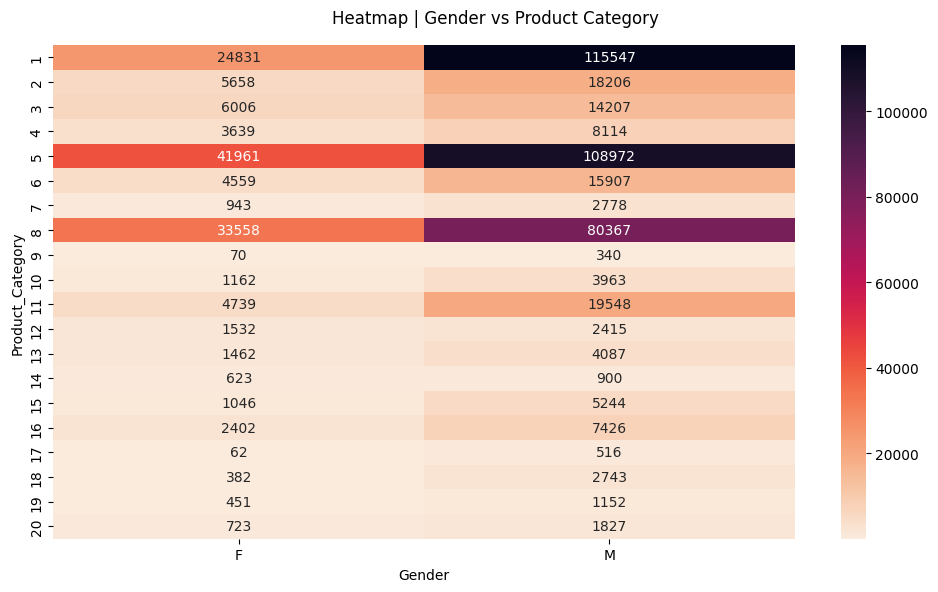

In [24]:
cross_tab = pd.crosstab(df['Product_Category'], df['Gender'])
plt.figure(figsize = (10,6))
sns.heatmap(cross_tab, annot=True, cmap='rocket_r', fmt="d")
plt.suptitle('Heatmap | Gender vs Product Category')
plt.tight_layout()
plt.show()

**Insights :**
- As already seen, again it is clearly visible that both Males and Females shop heavily in the Product Categories 1, 5 and 8.
- There is no Product Category wherein Females shop more than Males.

### ***Relationship between age, marital status, and the amount spent?***

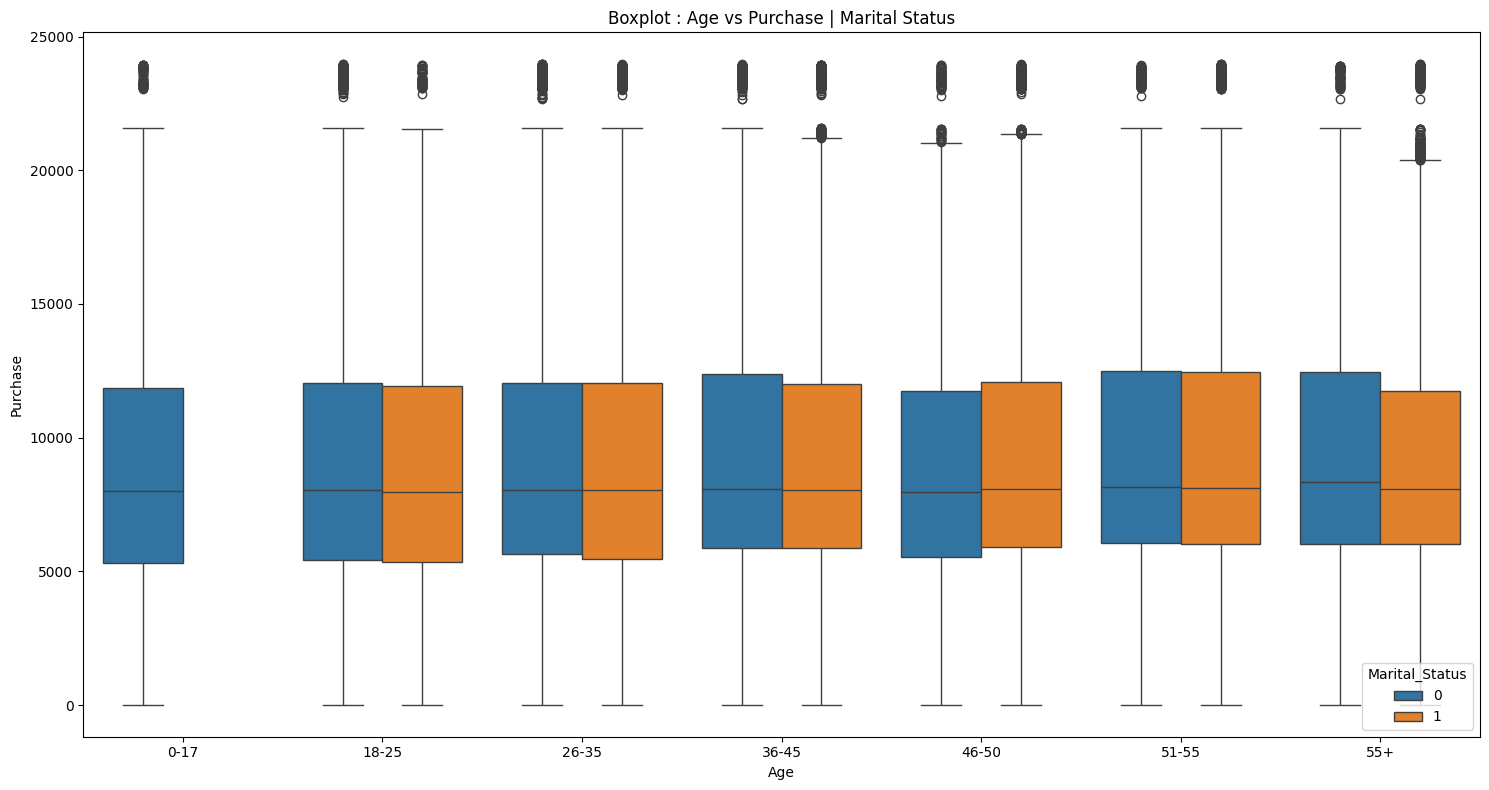

In [25]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.title('Boxplot : Age vs Purchase | Marital Status')
plt.tight_layout()
plt.show()

### ***Age vs Other Variables : Mean Purchase Amounts***

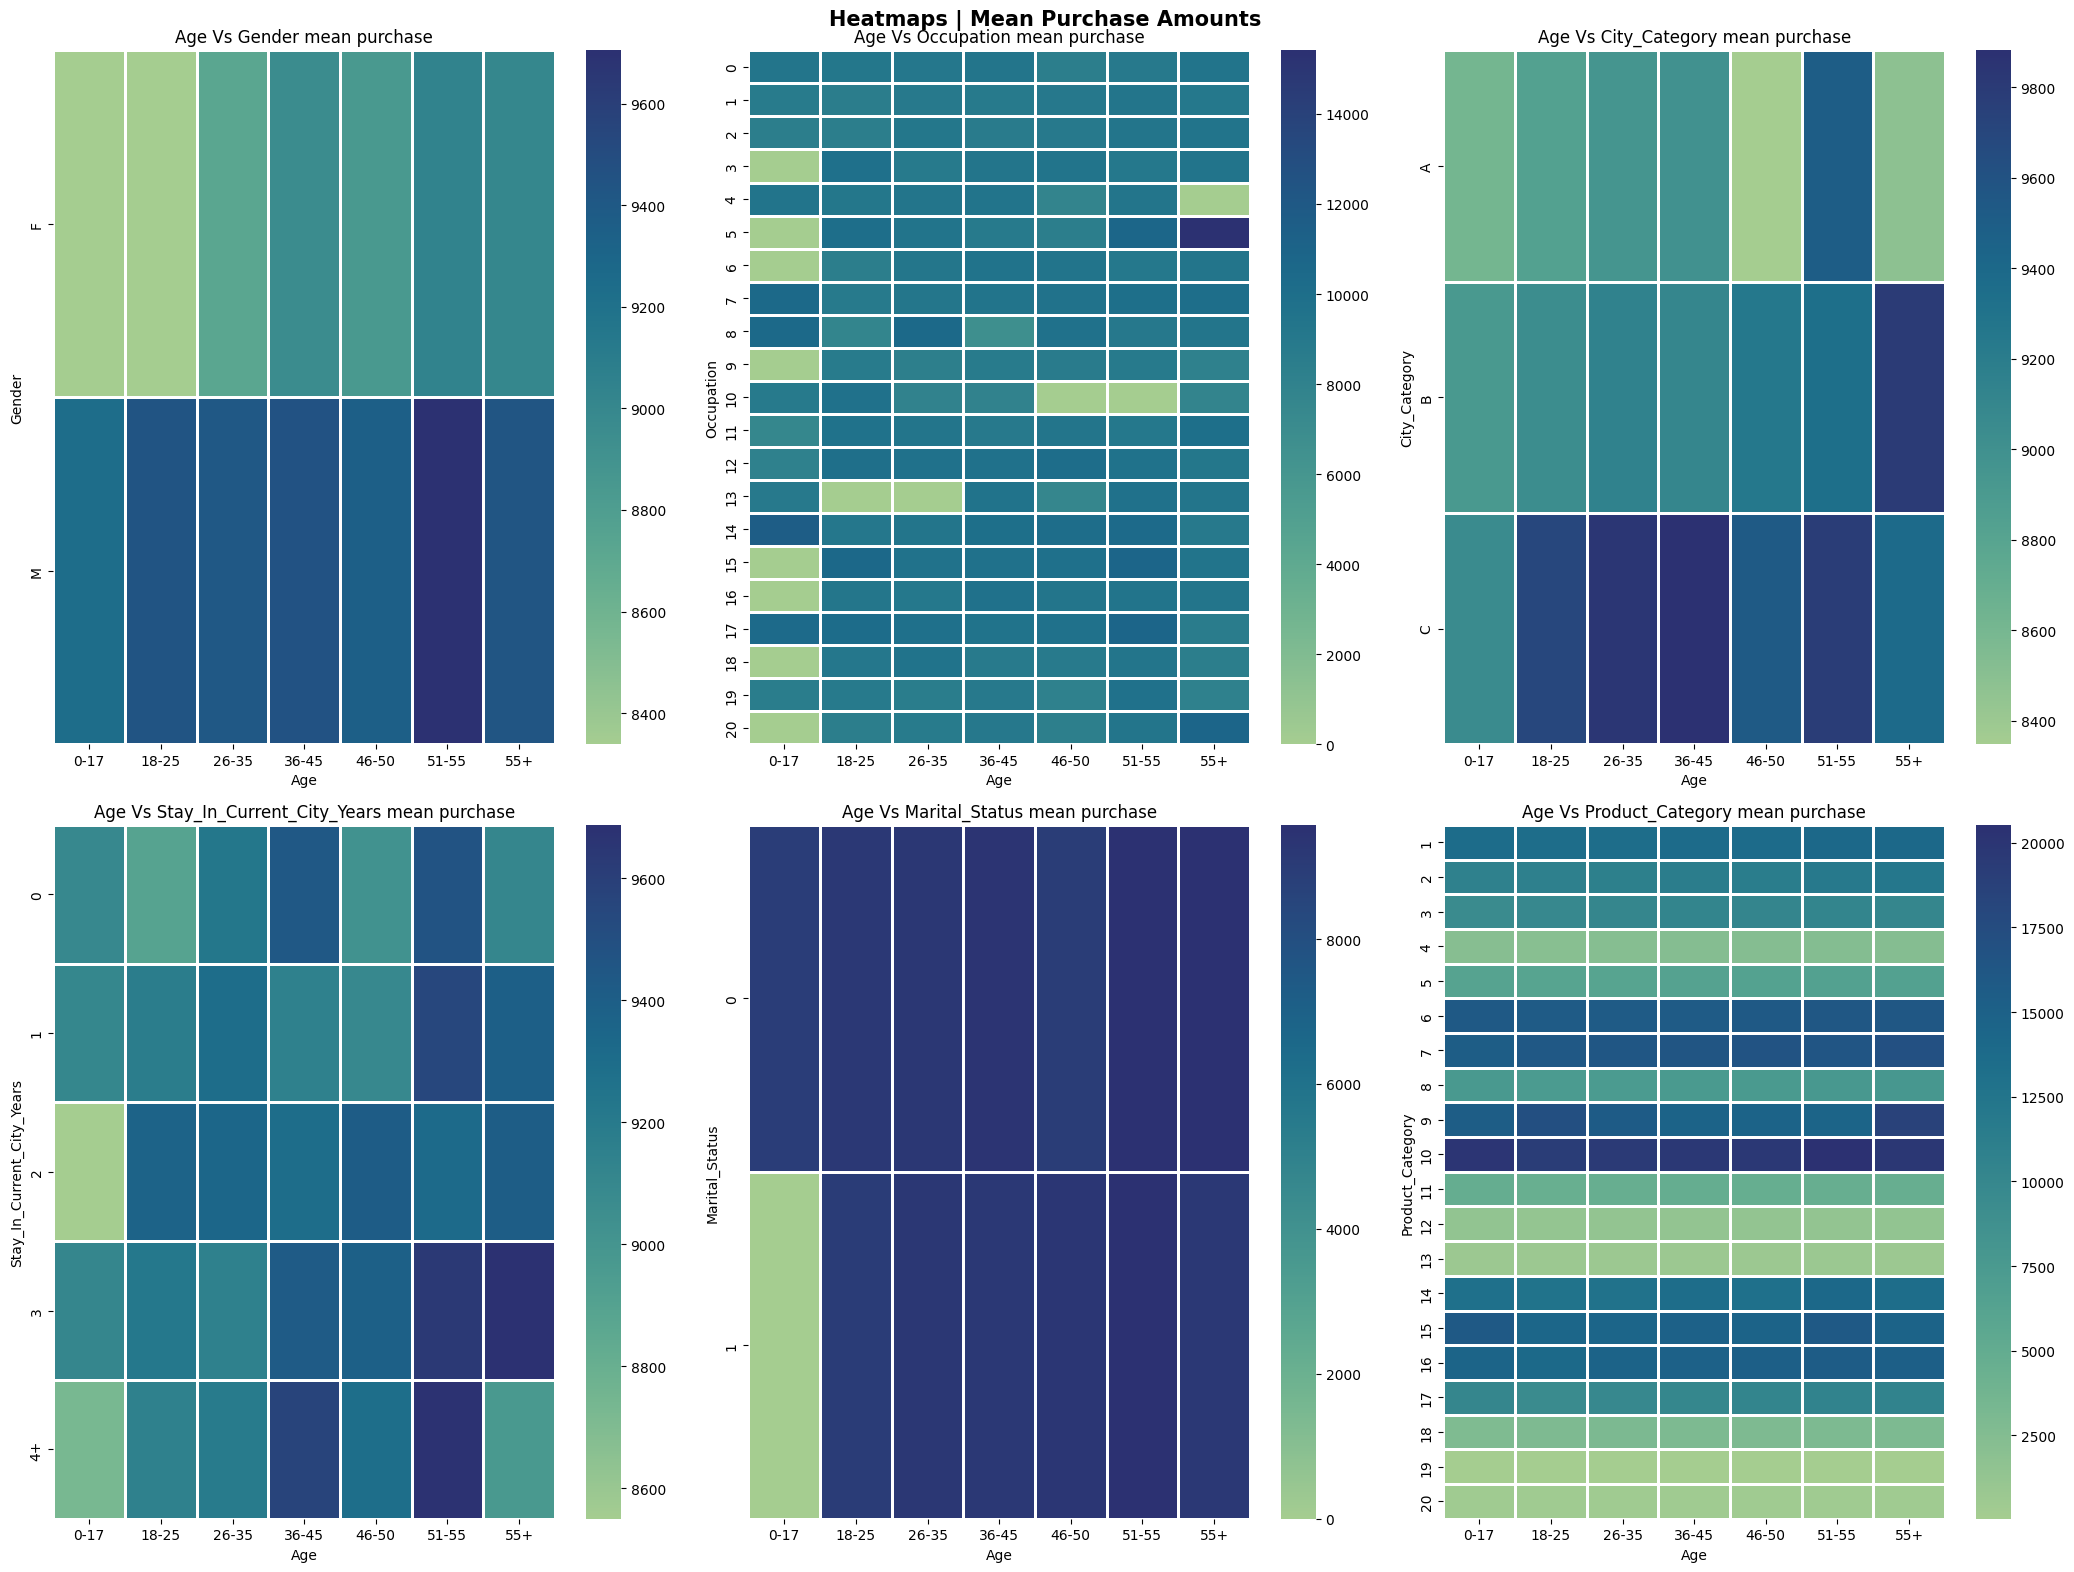

In [26]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(21,16))
r = 0
c = 0

for col in df.select_dtypes(include='category').columns:
  if col != 'Age':
    sns.heatmap(
        df.groupby(['Age',col])['Purchase'].mean().unstack().fillna(0).T,
        linewidth=1,
        ax=ax[r,c],
        cmap = 'crest'
        ).set(title = f'Age Vs {col} mean purchase')
    if c>=2:
      c=0
      r+=1
    else:
      c+=1

plt.suptitle('Heatmaps | Mean Purchase Amounts', size = 15, weight = 'bold')
plt.tight_layout()
plt.show()

**Insights :**
- Mean Purchase Amount is higher for Males than Females across all Age groups.
- Mean Purchase Amount is close to zero in the 0-17 age group for Partnered people, which makes sense since there are no Married people below the age of 18.
- The Mean purchase amount is higher for the City category 'C' than the others for most age groups.
- Product Category '10' has the highest mean purchase amount and across all the age categories.

<div style="page-break-after: always;"></div>

---

## **Confidence Intervals**

In [27]:
def bootstrap_ci(sample, size):
  resampled_means = []
  for _ in range(30000):
    resamp_mean = np.random.choice(sample, size = size, replace = True).mean()
    resampled_means.append(resamp_mean)

  return np.percentile(resampled_means, [2.5, 97.5]), resampled_means

In [28]:
def plot_ci(data, mu, color, title):
  with plt.style.context('ggplot'):
    plt.figure(figsize = (20,5))
    ax = sns.kdeplot(data[1], color = color)

    line = ax.get_lines()[0]
    y_data = line.get_ydata()

    plt.axvline(x=mu, color='#778DA9', linestyle='-.')
    ax.text(
        x = mu+1,
        y = y_data.max()*0.4,
        s = f"{round(f_mean, 2)}\nActual mean",
        color='#3b3734',
        weight='bold'
        )

    plt.axvline(x=data[0][0], color='#415A77', linestyle=':')
    ax.text(
        x = data[0][0]+1,
        y = y_data.max()*0.4,
        s = f"{round(data[0][0], 2)}\nLower bound",
        color='#3b3734',
        weight='bold'
        )

    plt.axvline(x=data[0][1], color='#415A77', linestyle=':')
    ax.text(
        x = data[0][1]+1,
        y = y_data.max()*0.4,
        s = f"{round(data[0][1], 2)}\nUpper bound",
        color='#3b3734',
        weight='bold'
        )

    plt.xlabel('Average Purchase Amount')
    plt.title(title, weight = 'bold')
    plt.tight_layout()
    plt.show()

### ***How does gender affect the amount spent?***

In [29]:
wal_f = df[df['Gender']=='F']['Purchase']
f_mean = wal_f.mean()
wal_m = df[df['Gender']=='M']['Purchase']
m_mean = wal_m.mean()

#### _Confidence Interval - Females | Entire data_

In [30]:
ci_female_orig = bootstrap_ci(wal_f, len(wal_f))
ci_female_orig[0]

array([8709.32335357, 8759.90643882])

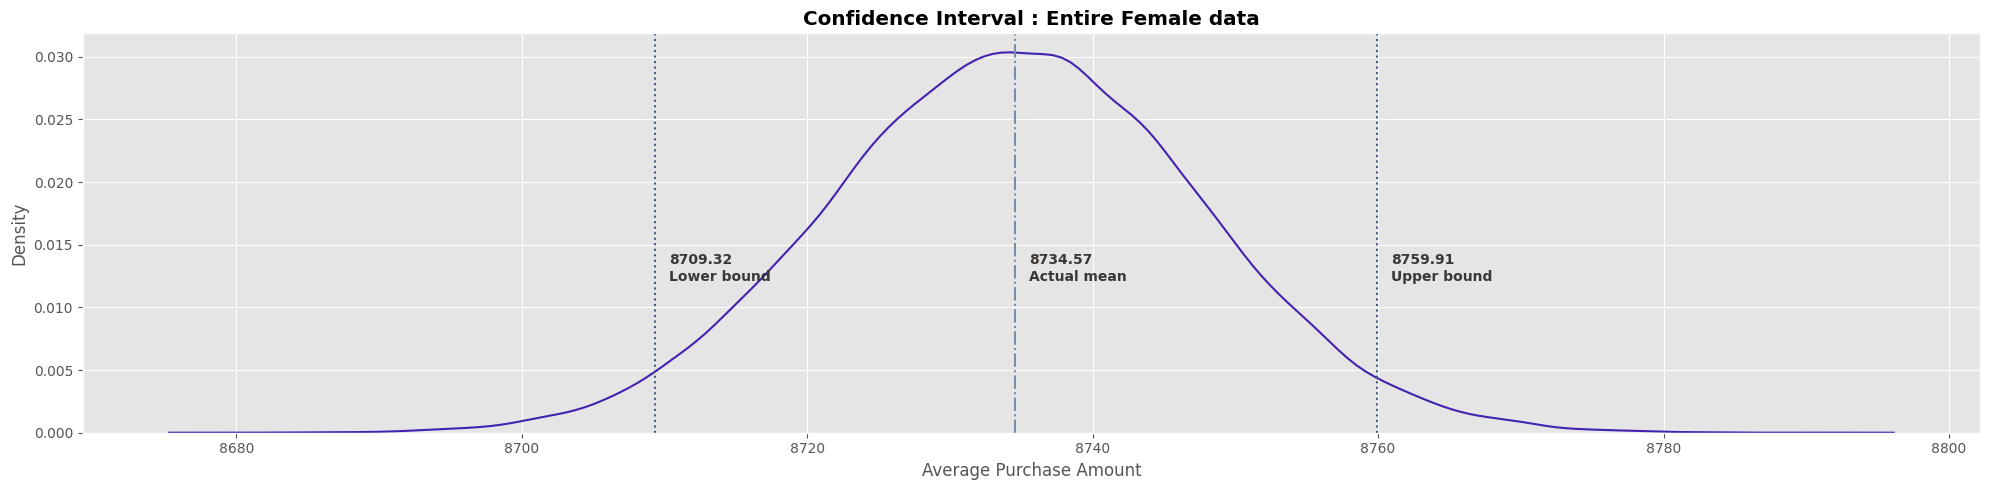

In [31]:
plot_ci(ci_female_orig, f_mean,'#4421af', 'Confidence Interval : Entire Female data')

#### _Confidence Interval - Females | Sample size : 300_

In [32]:
ci_female_300 = bootstrap_ci(wal_f, 300)
ci_female_300[0]

array([8204.68608333, 9279.525     ])

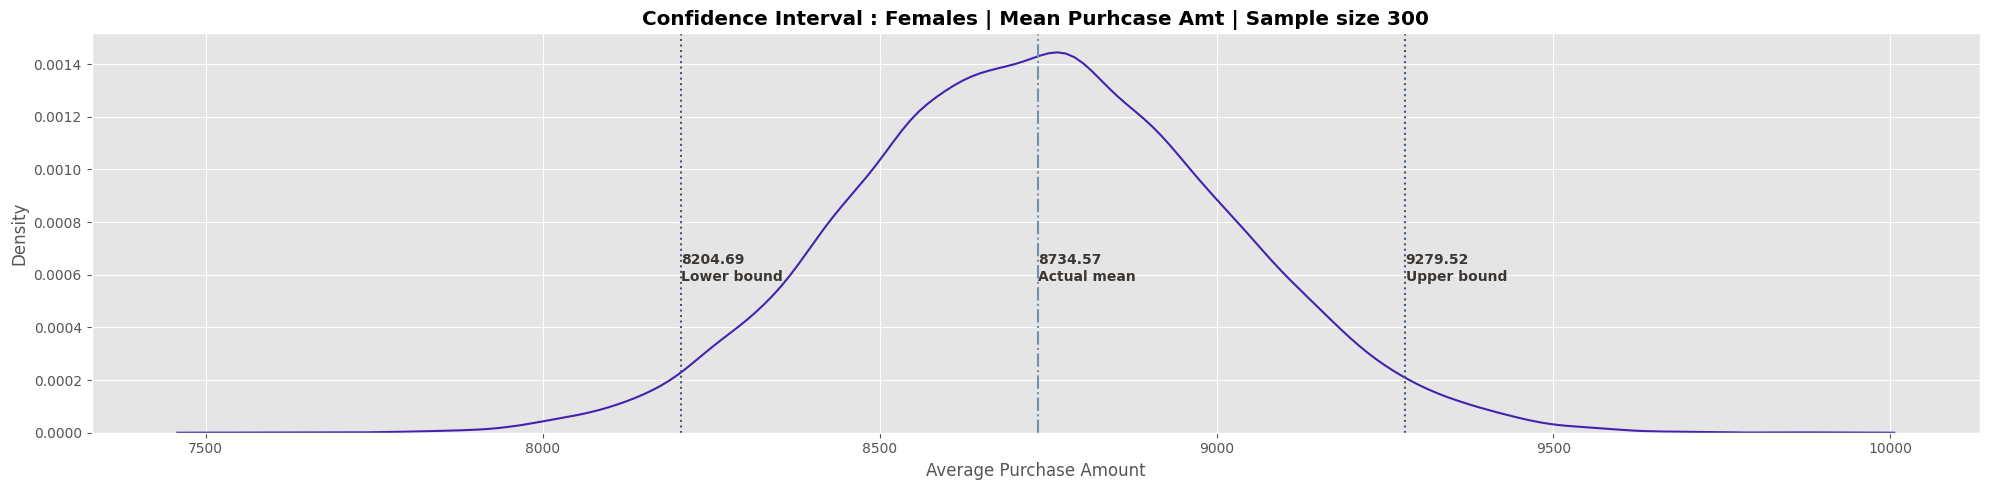

In [33]:
plot_ci(ci_female_300, f_mean,'#4421af', 'Confidence Interval : Females | Mean Purhcase Amt | Sample size 300')

#### _Confidence Interval - Females | Sample size : 3000_

In [34]:
ci_female_3000 = bootstrap_ci(wal_f, 3000)
ci_female_3000[0]

array([8566.68603333, 8904.57996667])

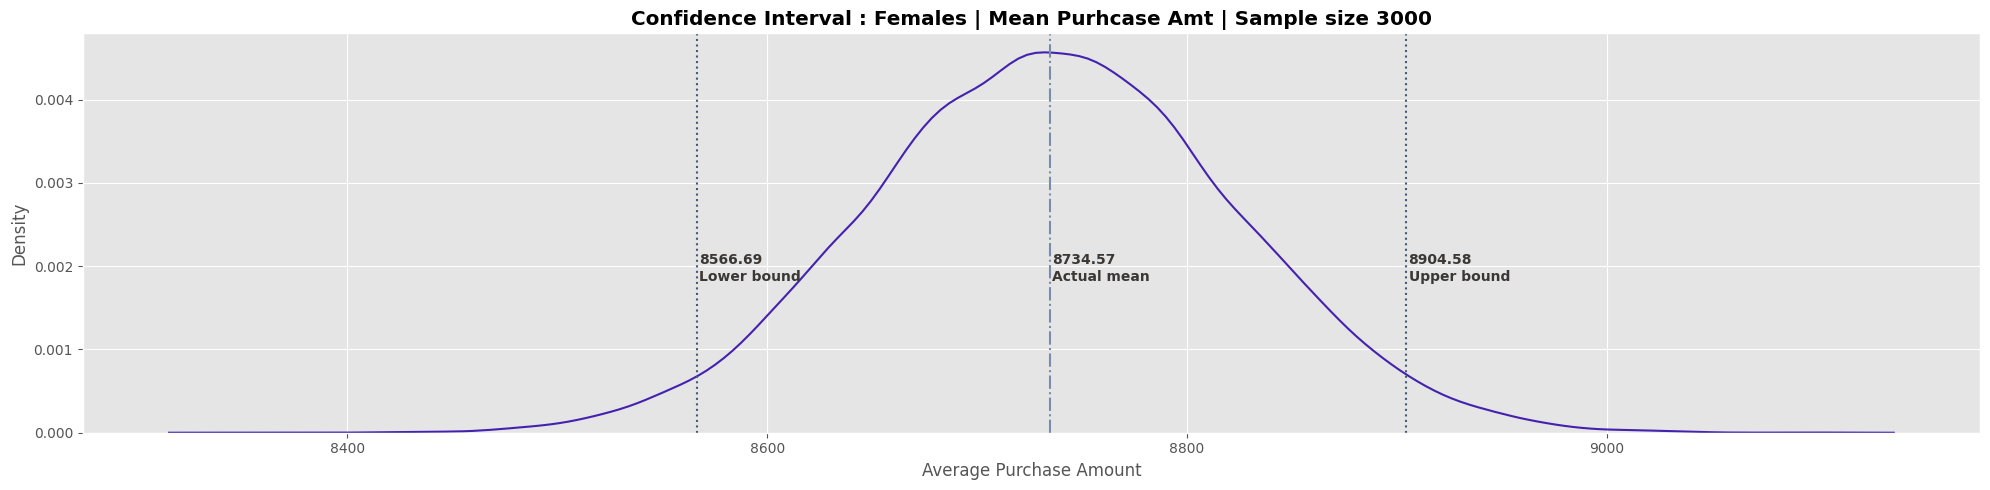

In [35]:
plot_ci(ci_female_3000, f_mean,'#4421af', 'Confidence Interval : Females | Mean Purhcase Amt | Sample size 3000')

#### _Confidence Interval - Females | Sample size : 30000_

In [36]:
ci_female_30000 = bootstrap_ci(wal_f, 30000)
ci_female_30000[0]

array([8680.82230333, 8788.20859   ])

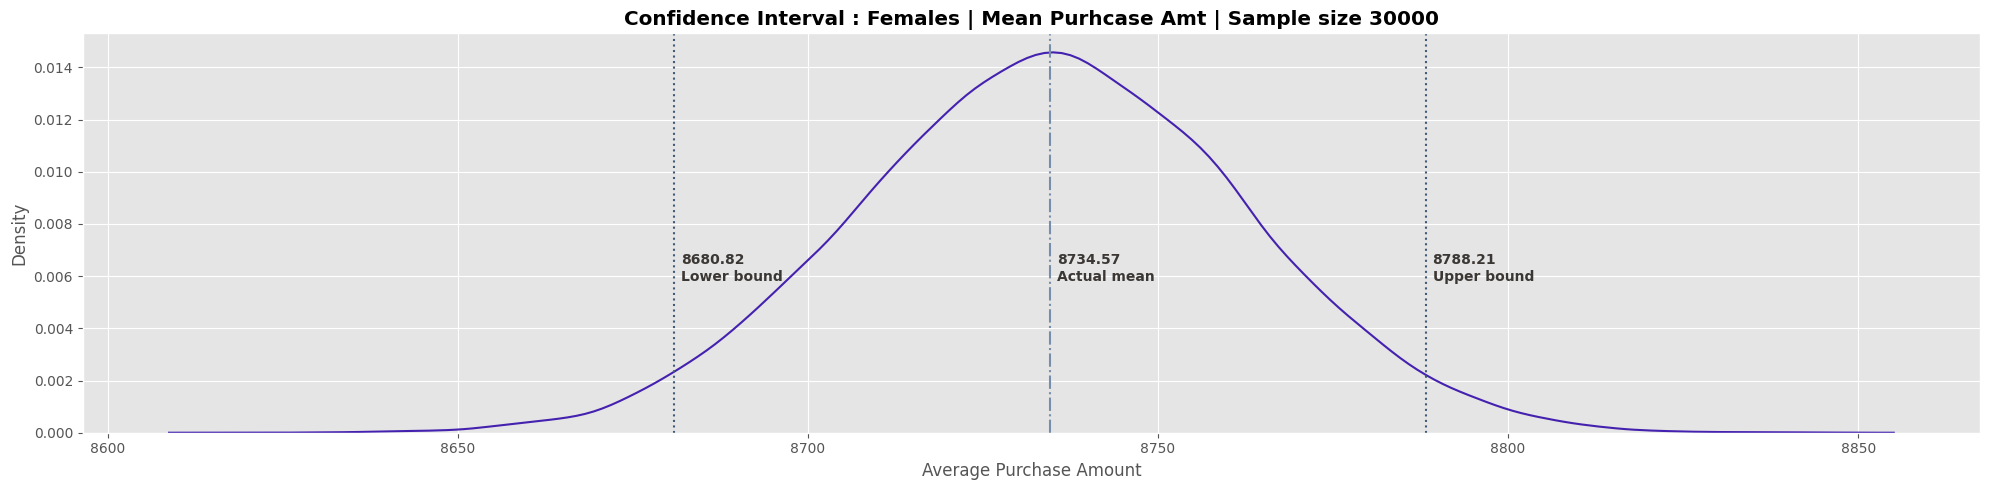

In [37]:
plot_ci(ci_female_30000, f_mean,'#4421af', 'Confidence Interval : Females | Mean Purhcase Amt | Sample size 30000')

#### _Confidence Interval - Males | Entire data_

In [38]:
ci_male_orig = bootstrap_ci(wal_m, len(wal_m))
ci_male_orig[0]

array([9421.99560854, 9452.95274388])

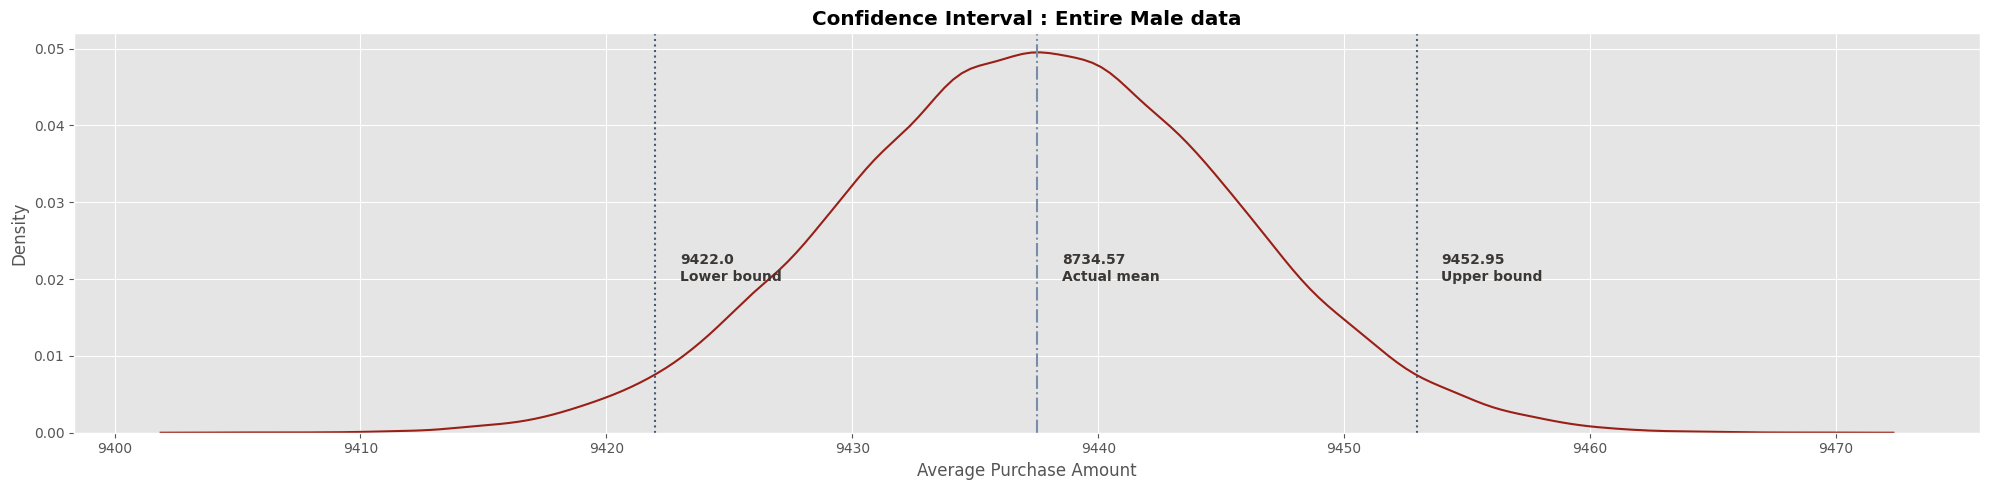

In [39]:
plot_ci(ci_male_orig, m_mean,'#991f17', 'Confidence Interval : Entire Male data')

#### _Confidence Interval - Males | Sample size : 300_

In [40]:
ci_male_300 = bootstrap_ci(wal_m, 300)
ci_male_300[0]

array([ 8857.24933333, 10021.01116667])

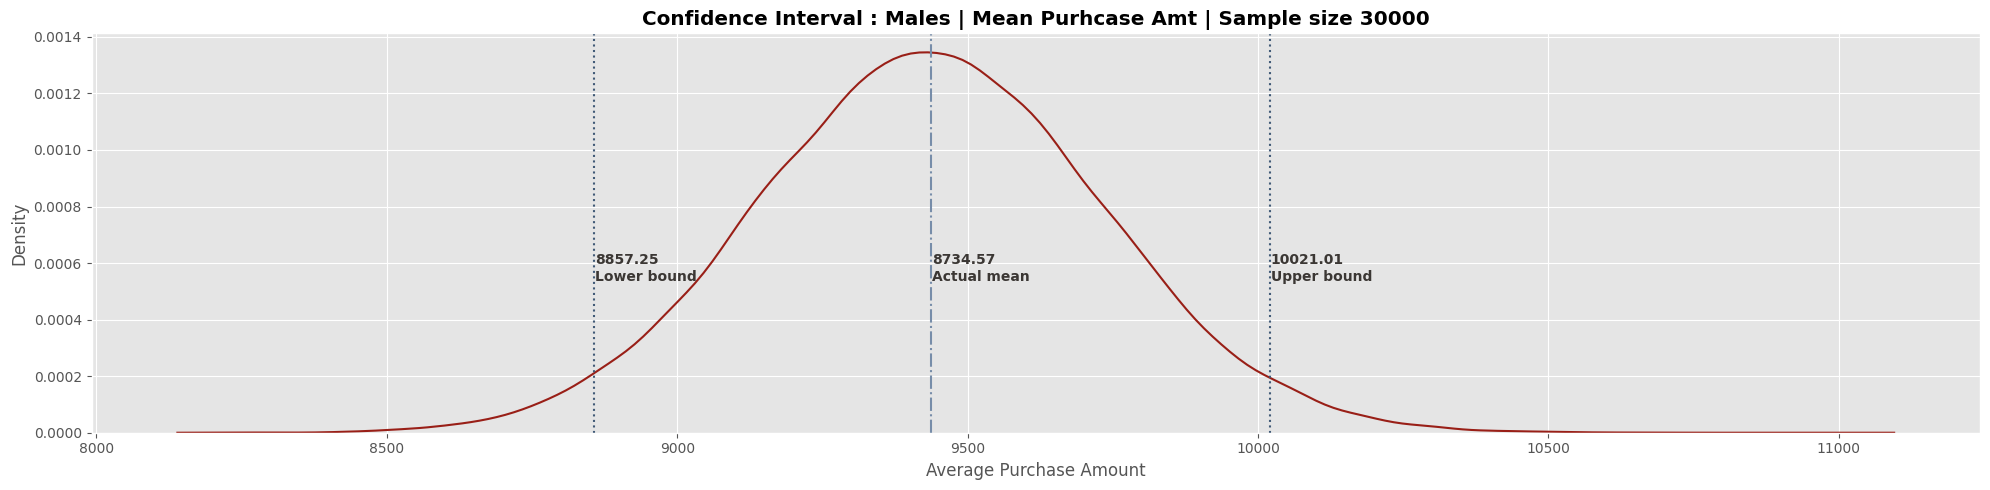

In [41]:
plot_ci(ci_male_300, m_mean,'#991f17', 'Confidence Interval : Males | Mean Purhcase Amt | Sample size 30000')

#### _Confidence Interval - Males | Sample size : 3000_

In [42]:
ci_male_3000 = bootstrap_ci(wal_m, 3000)
ci_male_3000[0]

array([9254.77515833, 9620.18234167])

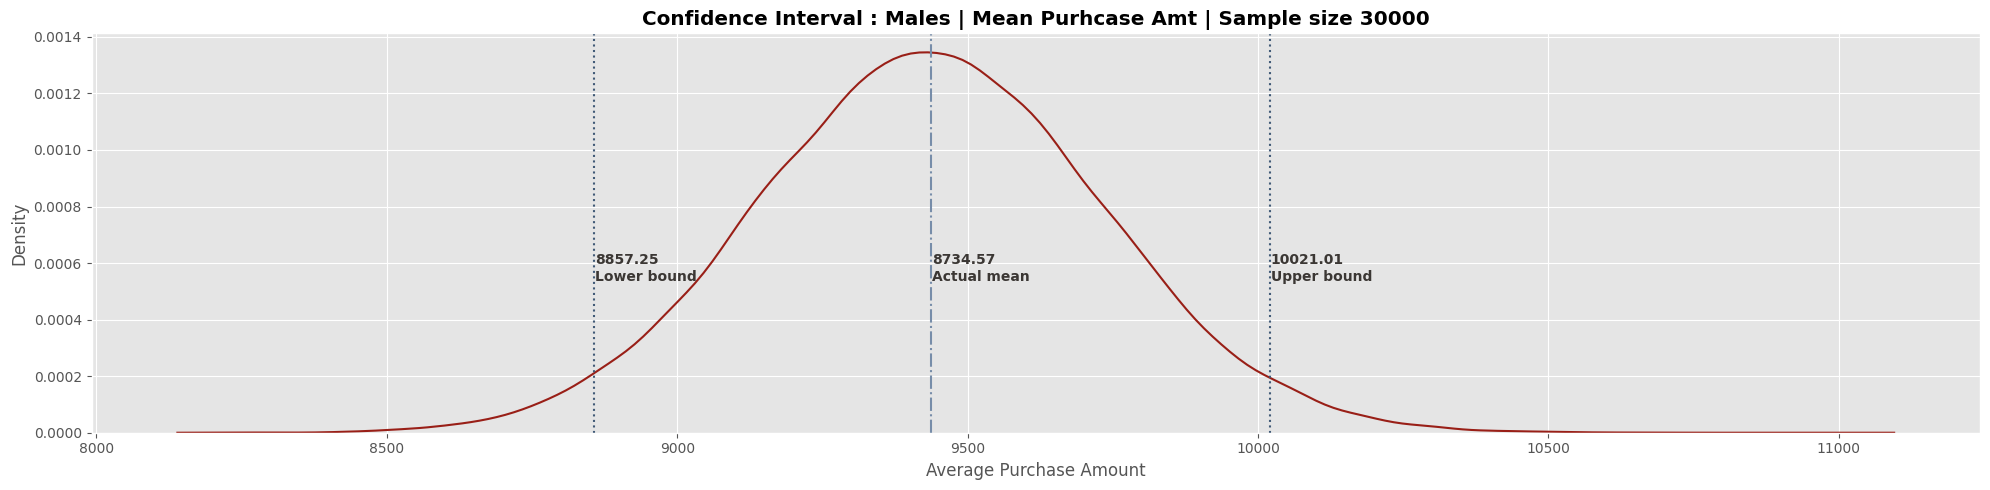

In [43]:
plot_ci(ci_male_300, m_mean,'#991f17', 'Confidence Interval : Males | Mean Purhcase Amt | Sample size 30000')

#### _Confidence Interval - Males | Sample size : 30000_

In [44]:
ci_male_30000 = bootstrap_ci(wal_m, 30000)
ci_male_30000[0]

array([9379.83109917, 9495.66017417])

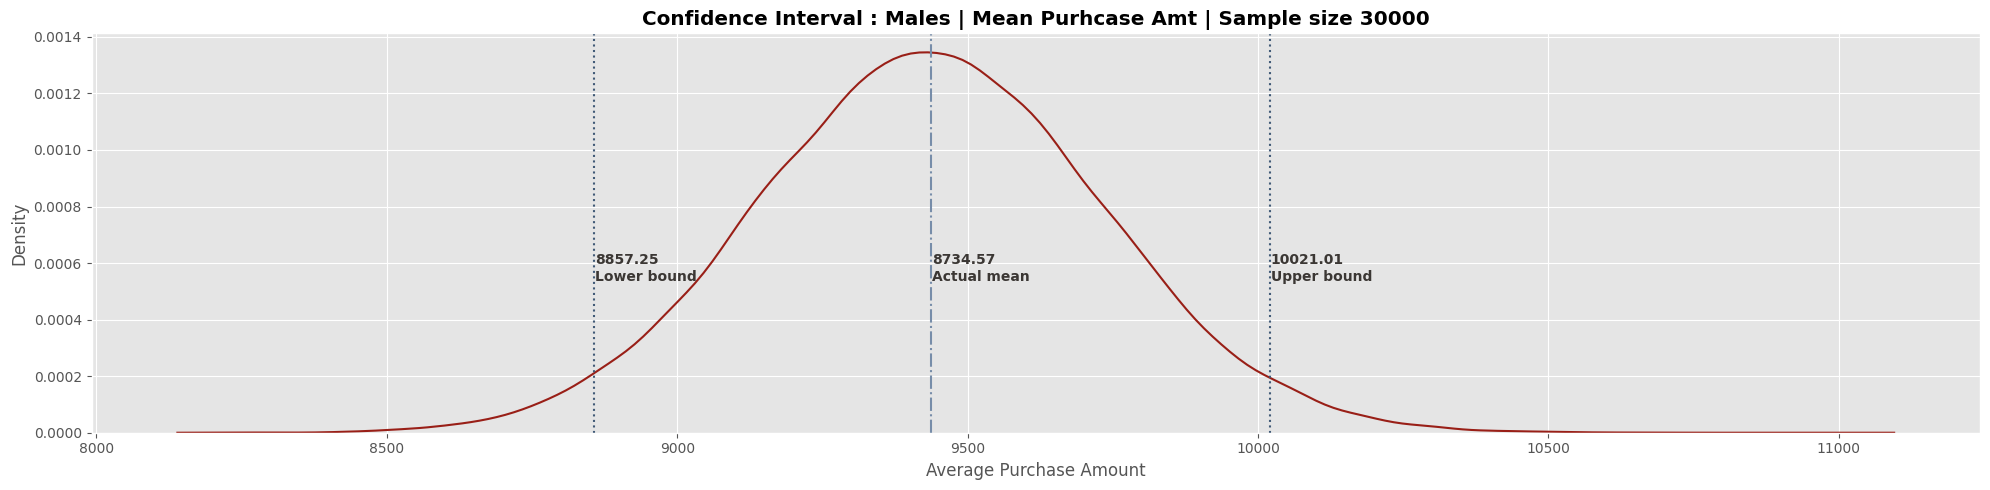

In [45]:
plot_ci(ci_male_300, m_mean,'#991f17', 'Confidence Interval : Males | Mean Purhcase Amt | Sample size 30000')

#### _OVERLAP BETWEEN DIFFERENT CONFIDENCE INTERVALS_

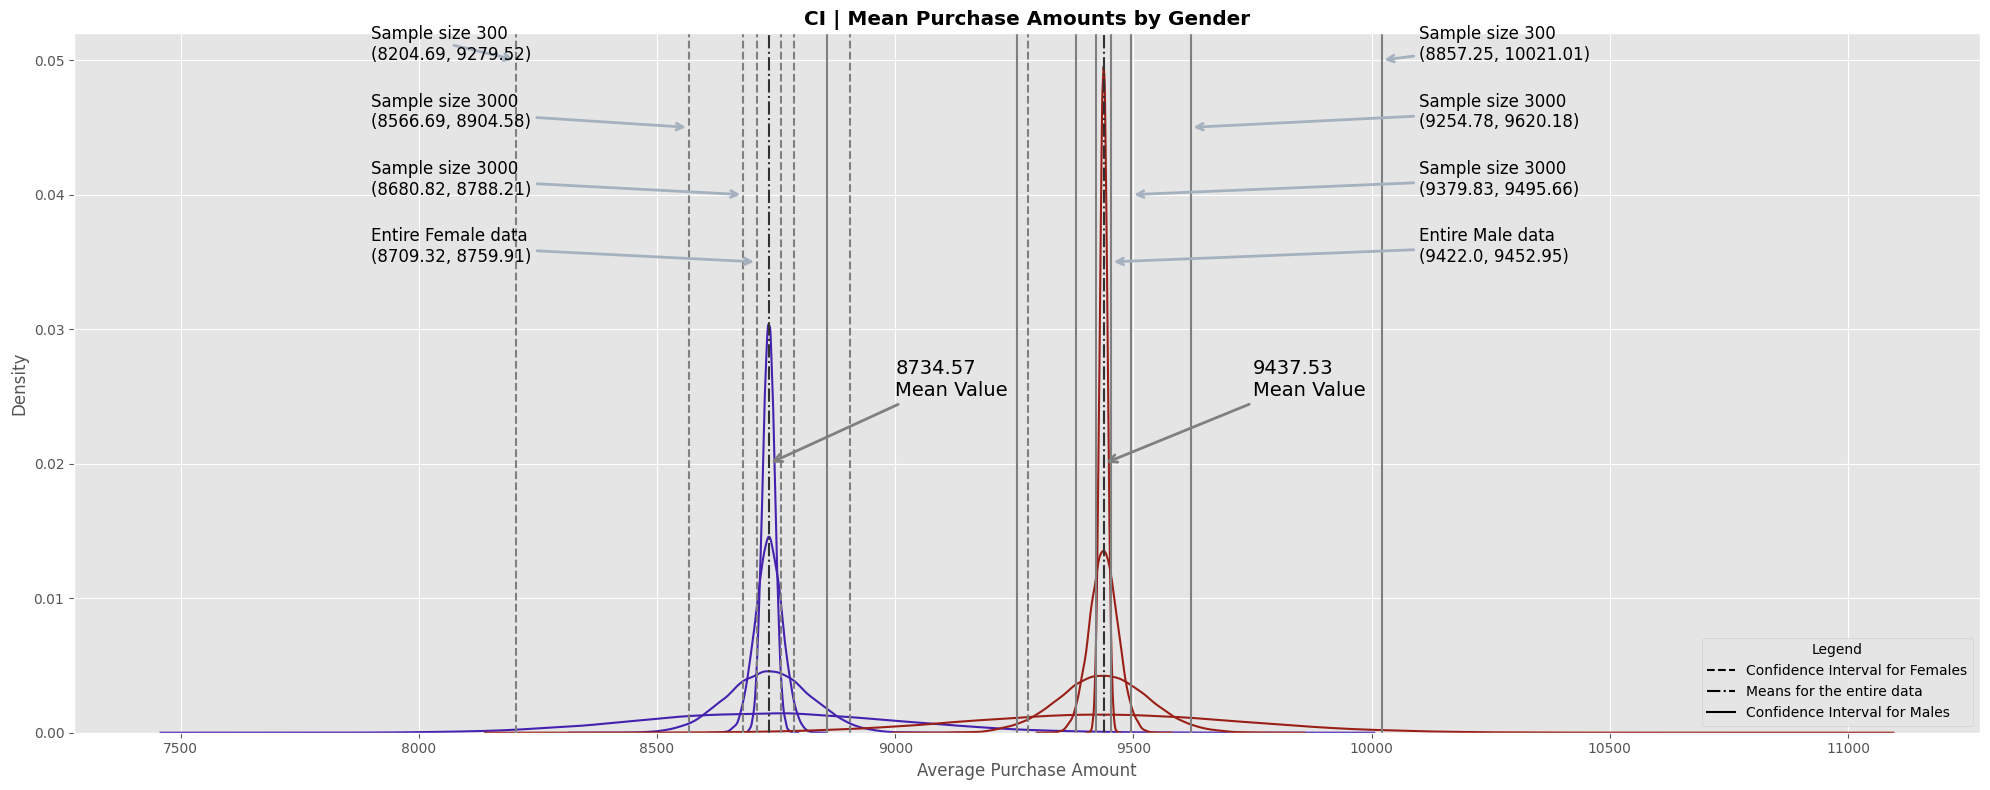

In [46]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(20, 8))

    # KDE plots
    sns.kdeplot(ci_female_300[1], color='#4421af')
    sns.kdeplot(ci_female_3000[1], color='#4421af')
    sns.kdeplot(ci_female_30000[1], color='#4421af')
    sns.kdeplot(ci_female_orig[1], color='#4421af')

    sns.kdeplot(ci_male_300[1], color='#991f17')
    sns.kdeplot(ci_male_3000[1], color='#991f17')
    sns.kdeplot(ci_male_30000[1], color='#991f17')
    sns.kdeplot(ci_male_orig[1], color='#991f17')

    # Vertical line for the mean
    plt.axvline(x=f_mean, color='#313131', linestyle='-.')
    plt.axvline(x=m_mean, color='#313131', linestyle='-.')

    # Drawing the actual means
    plt.annotate(f'{round(f_mean, 2)}\nMean Value', xy=(f_mean, 0.02), xytext=(9000, 0.025), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=14)
    plt.annotate(f'{round(m_mean, 2)}\nMean Value', xy=(m_mean, 0.02), xytext=(9750, 0.025), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=14)

    # Plotting the Confidence Intervals lines
    plt.axvline(x=ci_male_300[0][0], color='grey')
    plt.axvline(x=ci_male_300[0][1], color='grey')
    plt.axvline(x=ci_male_3000[0][0], color='grey')
    plt.axvline(x=ci_male_3000[0][1], color='grey')
    plt.axvline(x=ci_male_30000[0][0], color='grey')
    plt.axvline(x=ci_male_30000[0][1], color='grey')
    plt.axvline(x=ci_male_orig[0][0], color='grey')
    plt.axvline(x=ci_male_orig[0][1], color='grey')

    plt.axvline(x=ci_female_300[0][0], color='grey', linestyle = '--')
    plt.axvline(x=ci_female_300[0][1], color='grey', linestyle = '--')
    plt.axvline(x=ci_female_3000[0][0], color='grey', linestyle = '--')
    plt.axvline(x=ci_female_3000[0][1], color='grey', linestyle = '--')
    plt.axvline(x=ci_female_30000[0][0], color='grey', linestyle = '--')
    plt.axvline(x=ci_female_30000[0][1], color='grey', linestyle = '--')
    plt.axvline(x=ci_female_orig[0][0], color='grey', linestyle = '--')
    plt.axvline(x=ci_female_orig[0][1], color='grey', linestyle = '--')

    # Annotating the confidence intervals
    plt.annotate(f'Sample size 300\n{round(ci_female_300[0][0],2),round(ci_female_300[0][1],2)}', xy=(ci_female_300[0][0], 0.05), xytext=(7900, 0.05), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)
    plt.annotate(f'Sample size 3000\n{round(ci_female_3000[0][0],2),round(ci_female_3000[0][1],2)}', xy=(ci_female_3000[0][0], 0.045), xytext=(7900, 0.045), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)
    plt.annotate(f'Sample size 3000\n{round(ci_female_30000[0][0],2),round(ci_female_30000[0][1],2)}', xy=(ci_female_30000[0][0], 0.04), xytext=(7900, 0.04), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)
    plt.annotate(f'Entire Female data\n{round(ci_female_orig[0][0],2),round(ci_female_orig[0][1],2)}', xy=(ci_female_orig[0][0], 0.035), xytext=(7900, 0.035), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)

    plt.annotate(f'Sample size 300\n{round(ci_male_300[0][0],2),round(ci_male_300[0][1],2)}', xy=(ci_male_300[0][1], 0.05), xytext=(10100, 0.05), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)
    plt.annotate(f'Sample size 3000\n{round(ci_male_3000[0][0],2),round(ci_male_3000[0][1],2)}', xy=(ci_male_3000[0][1], 0.045), xytext=(10100, 0.045), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)
    plt.annotate(f'Sample size 3000\n{round(ci_male_30000[0][0],2),round(ci_male_30000[0][1],2)}', xy=(ci_male_30000[0][1], 0.04), xytext=(10100, 0.04), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)
    plt.annotate(f'Entire Male data\n{round(ci_male_orig[0][0],2),round(ci_male_orig[0][1],2)}', xy=(ci_male_orig[0][1], 0.035), xytext=(10100, 0.035), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)

    # Creating custom legend elements
    legend_elements = [
        Line2D([0], [0], color='black', linestyle='--', label='Confidence Interval for Females'),
        Line2D([0], [0], color='black', linestyle='-.', label='Means for the entire data'),
        Line2D([0], [0], color='black', linestyle='-', label='Confidence Interval for Males')
    ]

    # Title and legend
    plt.xlabel('Average Purchase Amount')
    plt.legend(handles=legend_elements, loc='lower right', title = 'Legend')
    plt.title('CI | Mean Purchase Amounts by Gender', weight='bold')
    plt.tight_layout()
    plt.show()


### ***How does Marital_Status affect the amount spent?***

In [47]:
wal_mar = df[df['Marital_Status']==1]['Purchase']
mar_mean = wal_mar.mean()
wal_bach = df[df['Marital_Status']==0]['Purchase']
bach_mean = wal_bach.mean()

#### _Confidence Interval - Married | Sample size : Entire data_

In [48]:
ci_mar_orig = bootstrap_ci(wal_mar, len(wal_mar))
ci_mar_orig[0]

array([9240.4322882 , 9281.64674454])

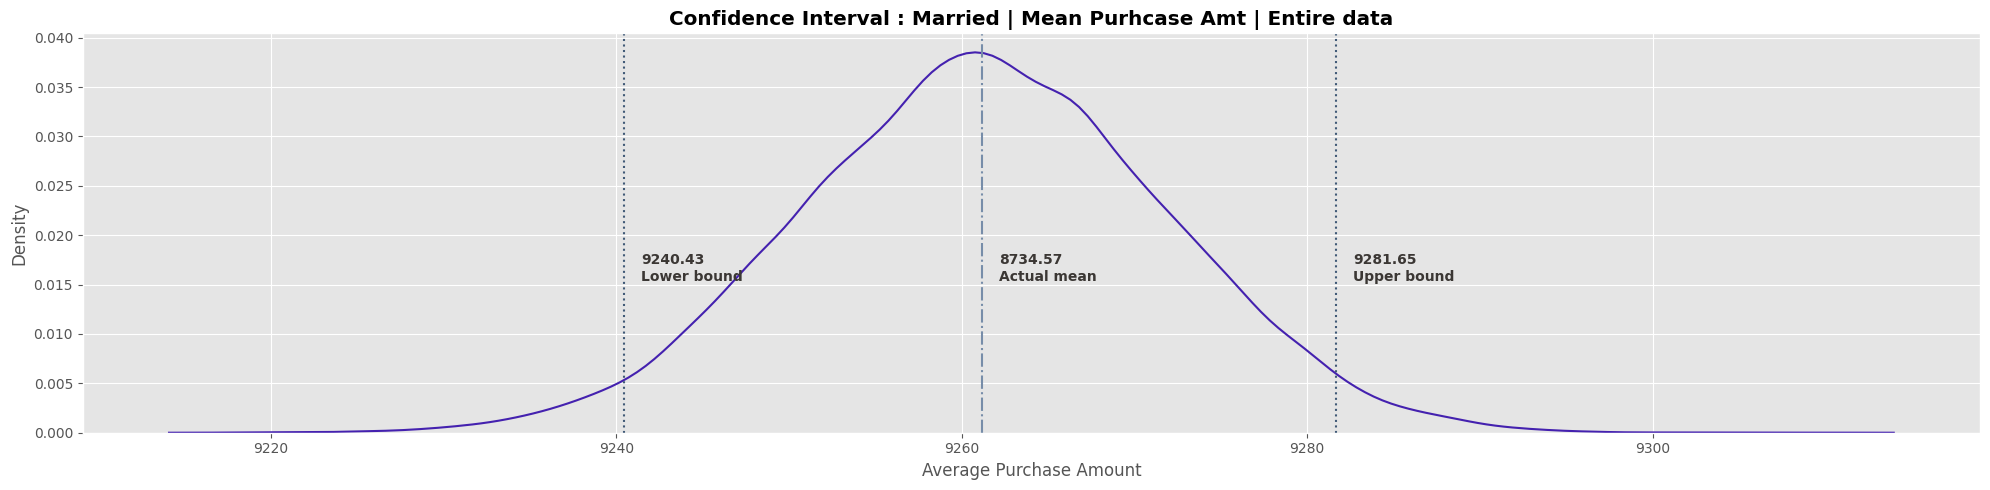

In [49]:
plot_ci(ci_mar_orig, mar_mean,'#4421af', 'Confidence Interval : Married | Mean Purhcase Amt | Entire data')

#### _Confidence Interval - Married | Sample size : 300_

In [50]:
ci_mar_300 = bootstrap_ci(wal_mar, 300)
ci_mar_300[0]

array([8698.53966667, 9831.62741667])

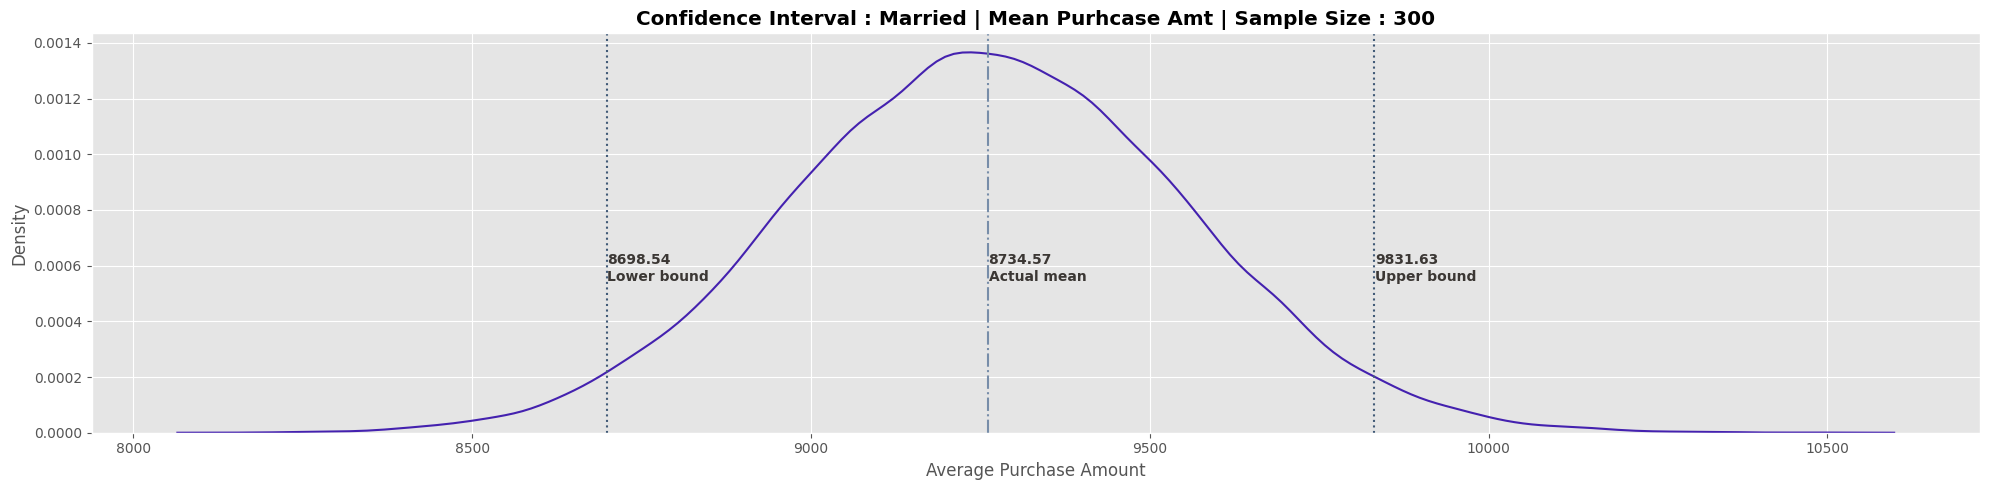

In [51]:
plot_ci(ci_mar_300, mar_mean,'#4421af', 'Confidence Interval : Married | Mean Purhcase Amt | Sample Size : 300')

#### _Confidence Interval - Married | Sample size : 3000_

In [52]:
ci_mar_3000 = bootstrap_ci(wal_mar, 3000)
ci_mar_3000[0]

array([9081.03631667, 9442.96016667])

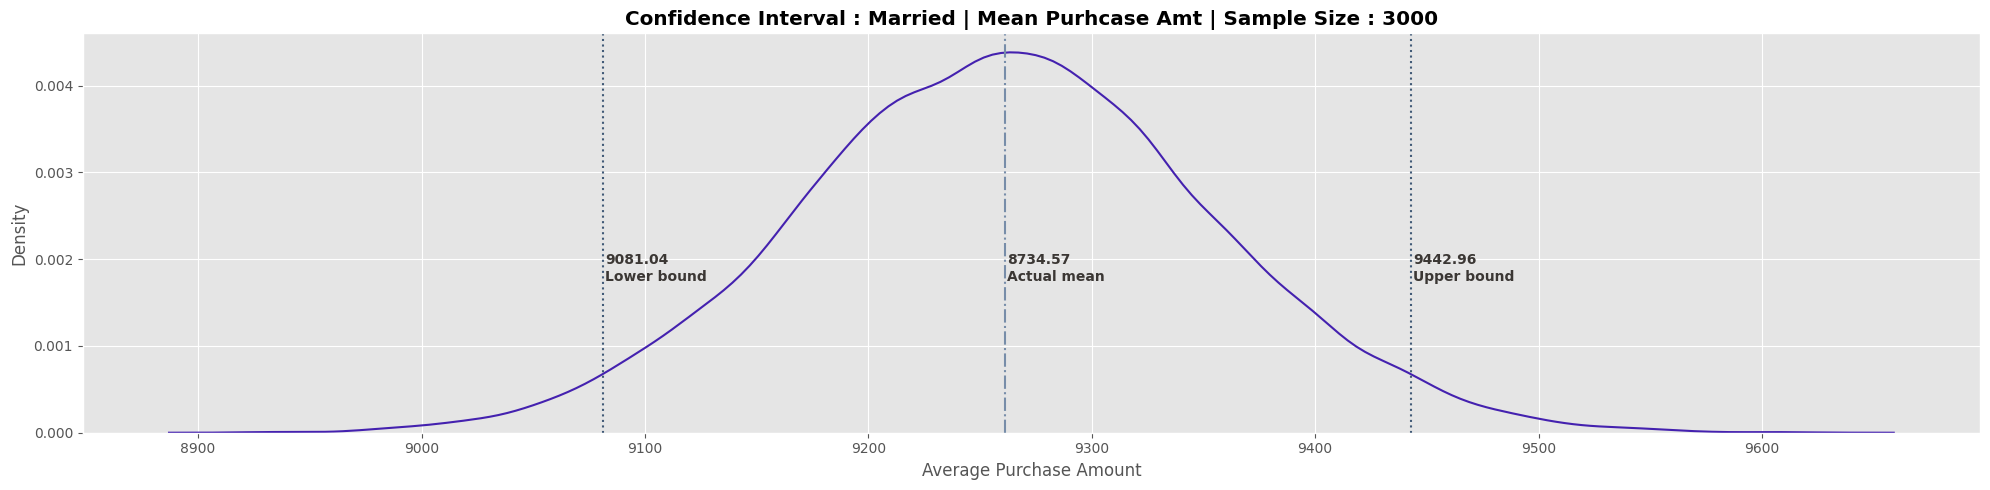

In [53]:
plot_ci(ci_mar_3000, mar_mean,'#4421af', 'Confidence Interval : Married | Mean Purhcase Amt | Sample Size : 3000')

#### _Confidence Interval - Married | Sample size : 30000_

In [54]:
ci_mar_30000 = bootstrap_ci(wal_mar, 30000)
ci_mar_30000[0]

array([9203.48964333, 9317.91435833])

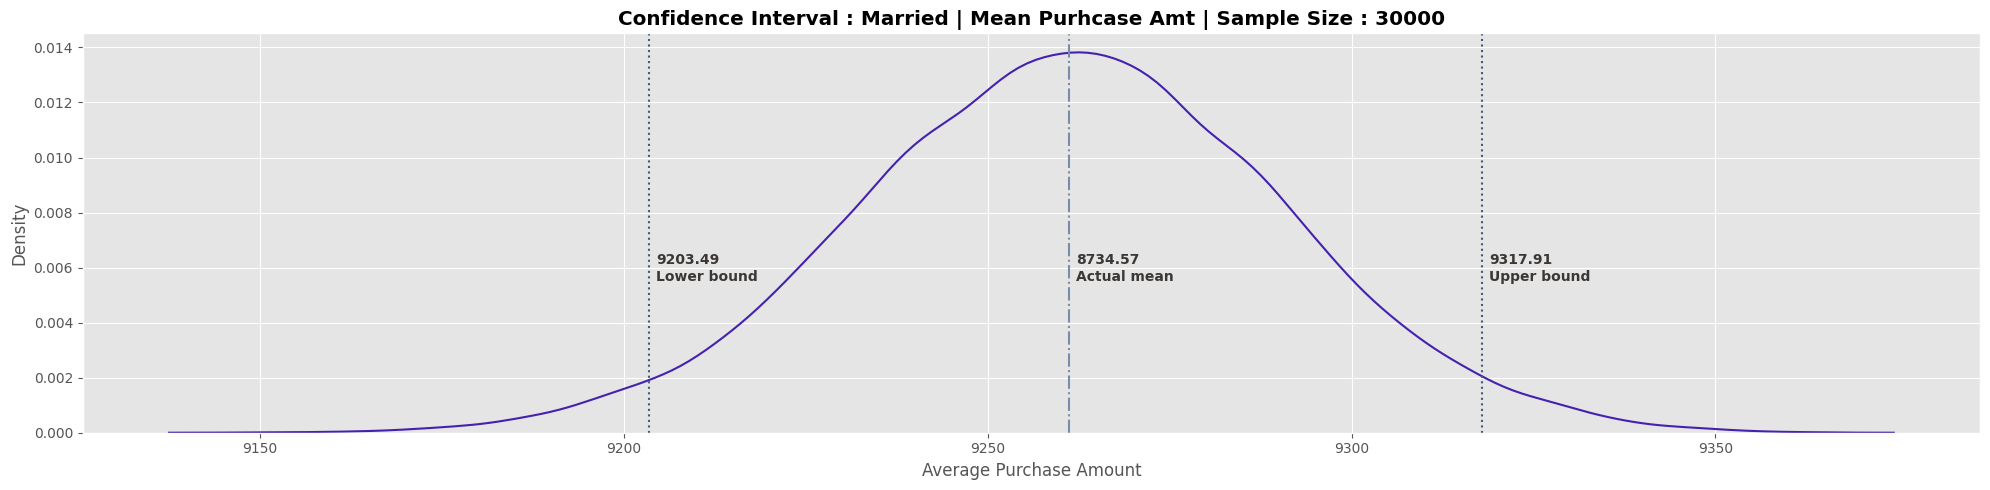

In [55]:
plot_ci(ci_mar_30000, mar_mean,'#4421af', 'Confidence Interval : Married | Mean Purhcase Amt | Sample Size : 30000')

#### _Confidence Interval - Bachelors | Sample size : Entire data_

In [56]:
ci_bach_orig = bootstrap_ci(wal_bach, len(wal_bach))
ci_bach_orig[0]

array([9248.50055361, 9283.29570375])

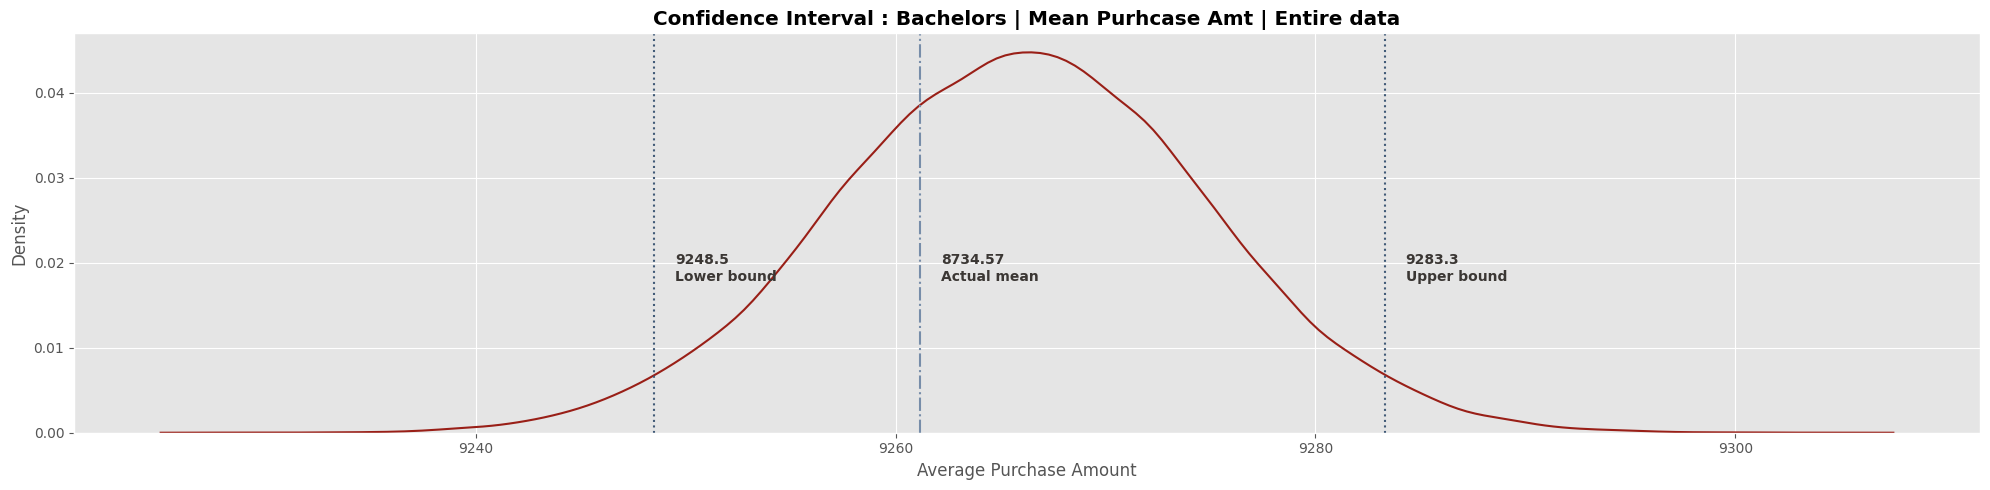

In [57]:
plot_ci(ci_bach_orig, mar_mean,'#991f17', 'Confidence Interval : Bachelors | Mean Purhcase Amt | Entire data')

#### _Confidence Interval - Bachelors | Sample size : 300_

In [58]:
ci_bach_300 = bootstrap_ci(wal_bach, 300)
ci_bach_300[0]

array([8705.73283333, 9835.54425   ])

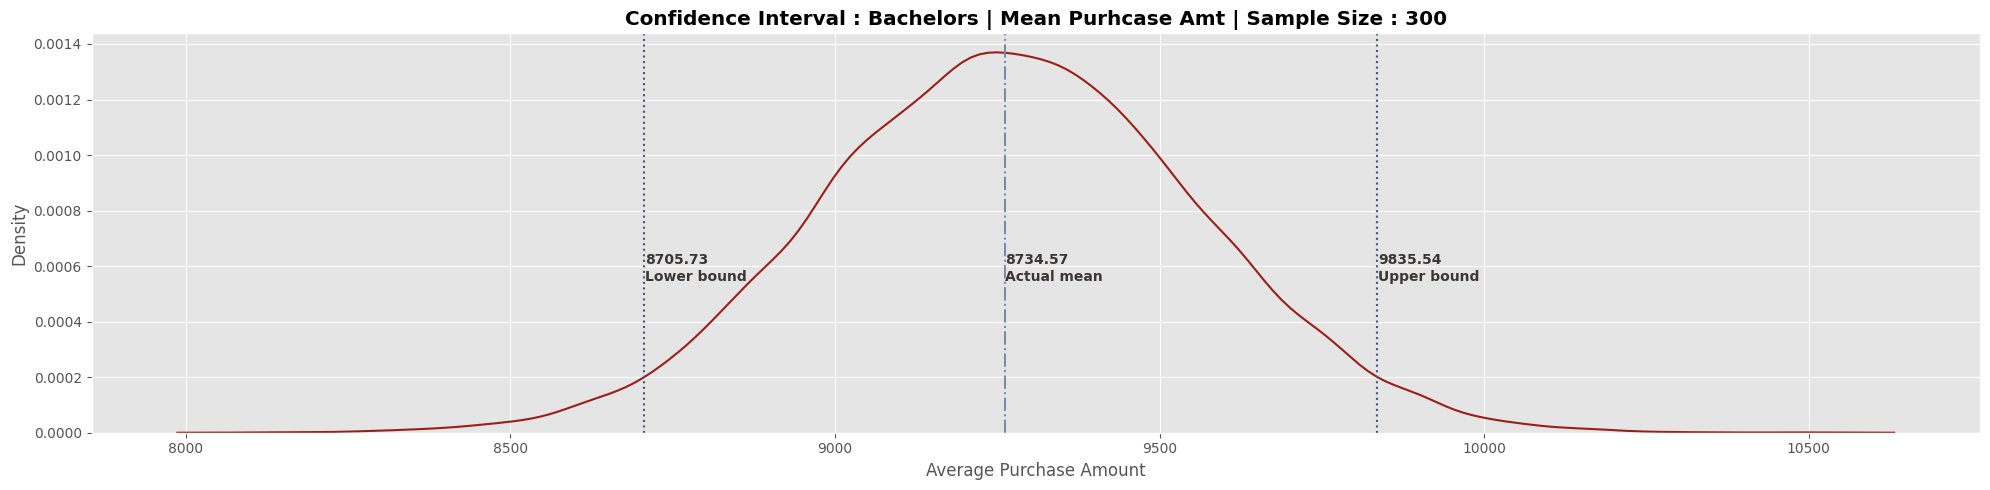

In [59]:
plot_ci(ci_bach_300, mar_mean,'#991f17', 'Confidence Interval : Bachelors | Mean Purhcase Amt | Sample Size : 300')

#### _Confidence Interval - Bachelors | Sample size : 3000_

In [60]:
ci_bach_3000 = bootstrap_ci(wal_bach, 3000)
ci_bach_3000[0]

array([9086.24285, 9441.81705])

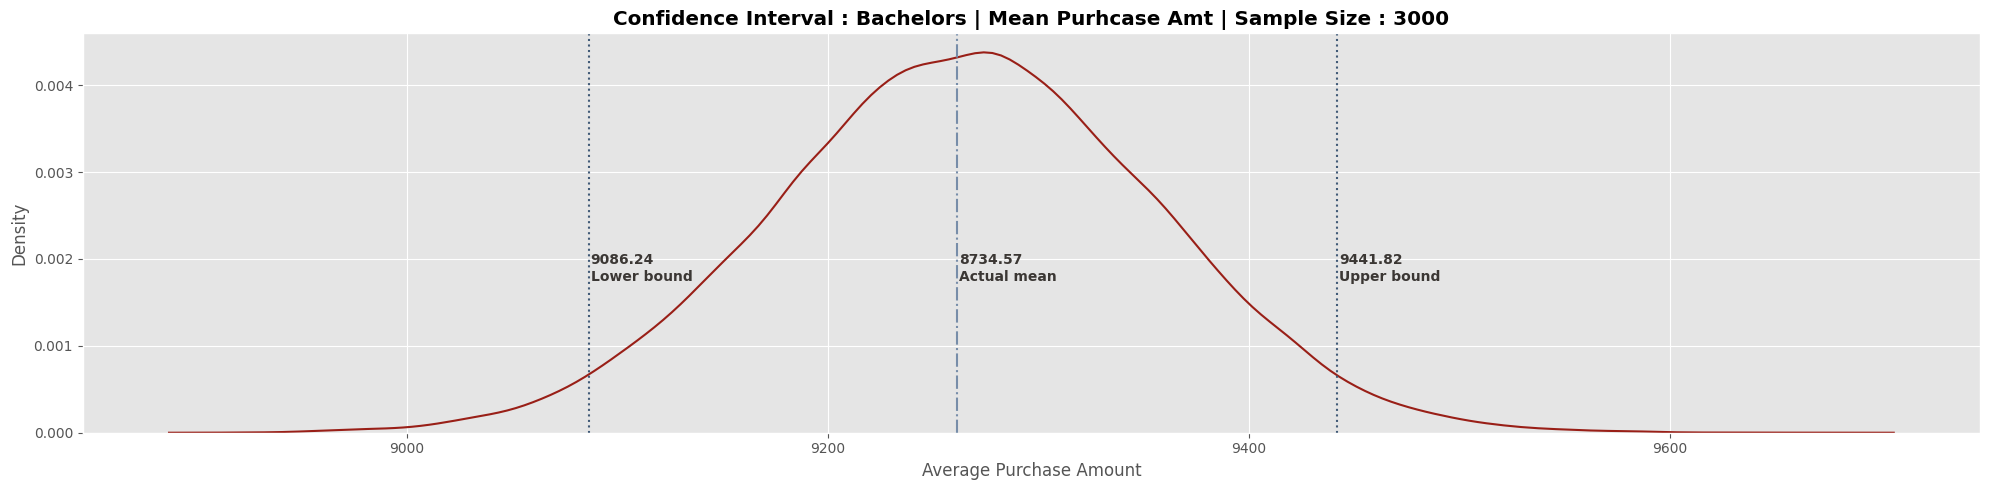

In [61]:
plot_ci(ci_bach_3000, mar_mean,'#991f17', 'Confidence Interval : Bachelors | Mean Purhcase Amt | Sample Size : 3000')

#### _Confidence Interval - Bachelors | Sample size : 30000_

In [62]:
ci_bach_30000 = bootstrap_ci(wal_bach, 30000)
ci_bach_30000[0]

array([9208.7119925 , 9323.03645167])

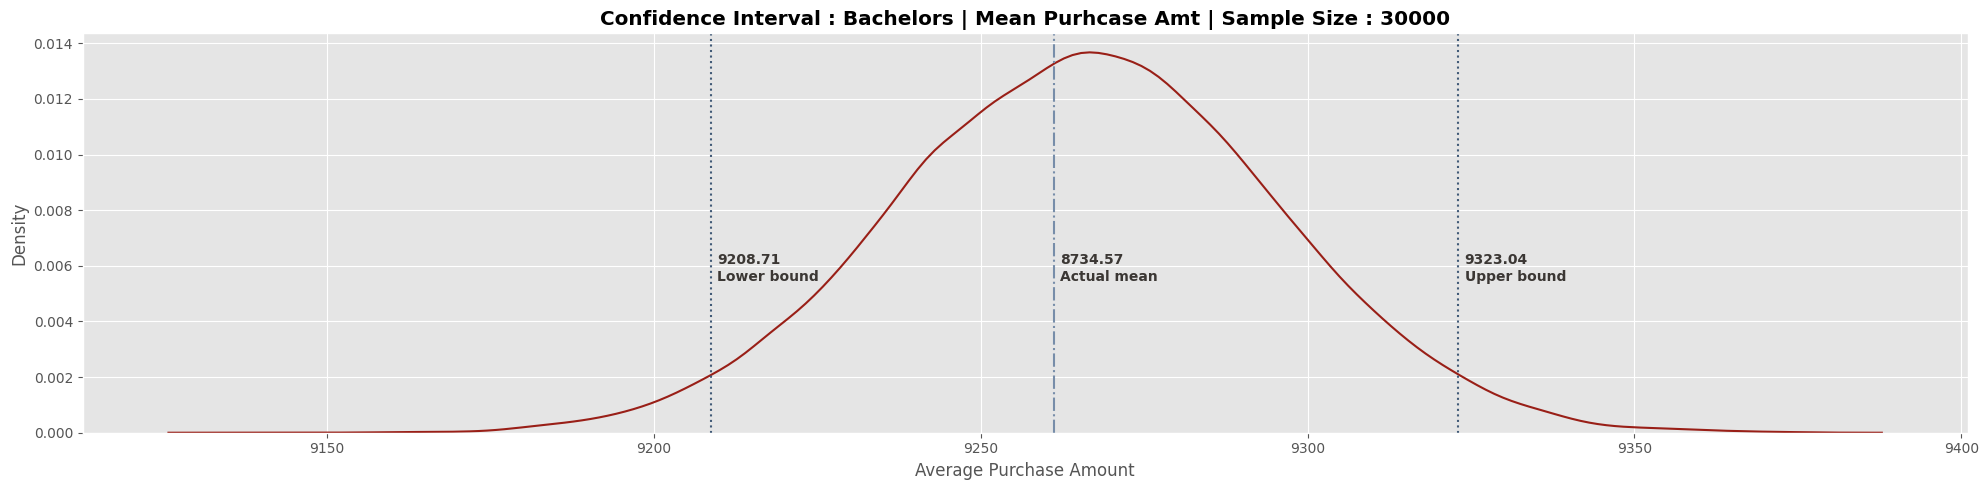

In [63]:
plot_ci(ci_bach_30000, mar_mean,'#991f17', 'Confidence Interval : Bachelors | Mean Purhcase Amt | Sample Size : 30000')

#### _OVERLAP BETWEEN DIFFERENT CONFIDENCE INTERVALS_

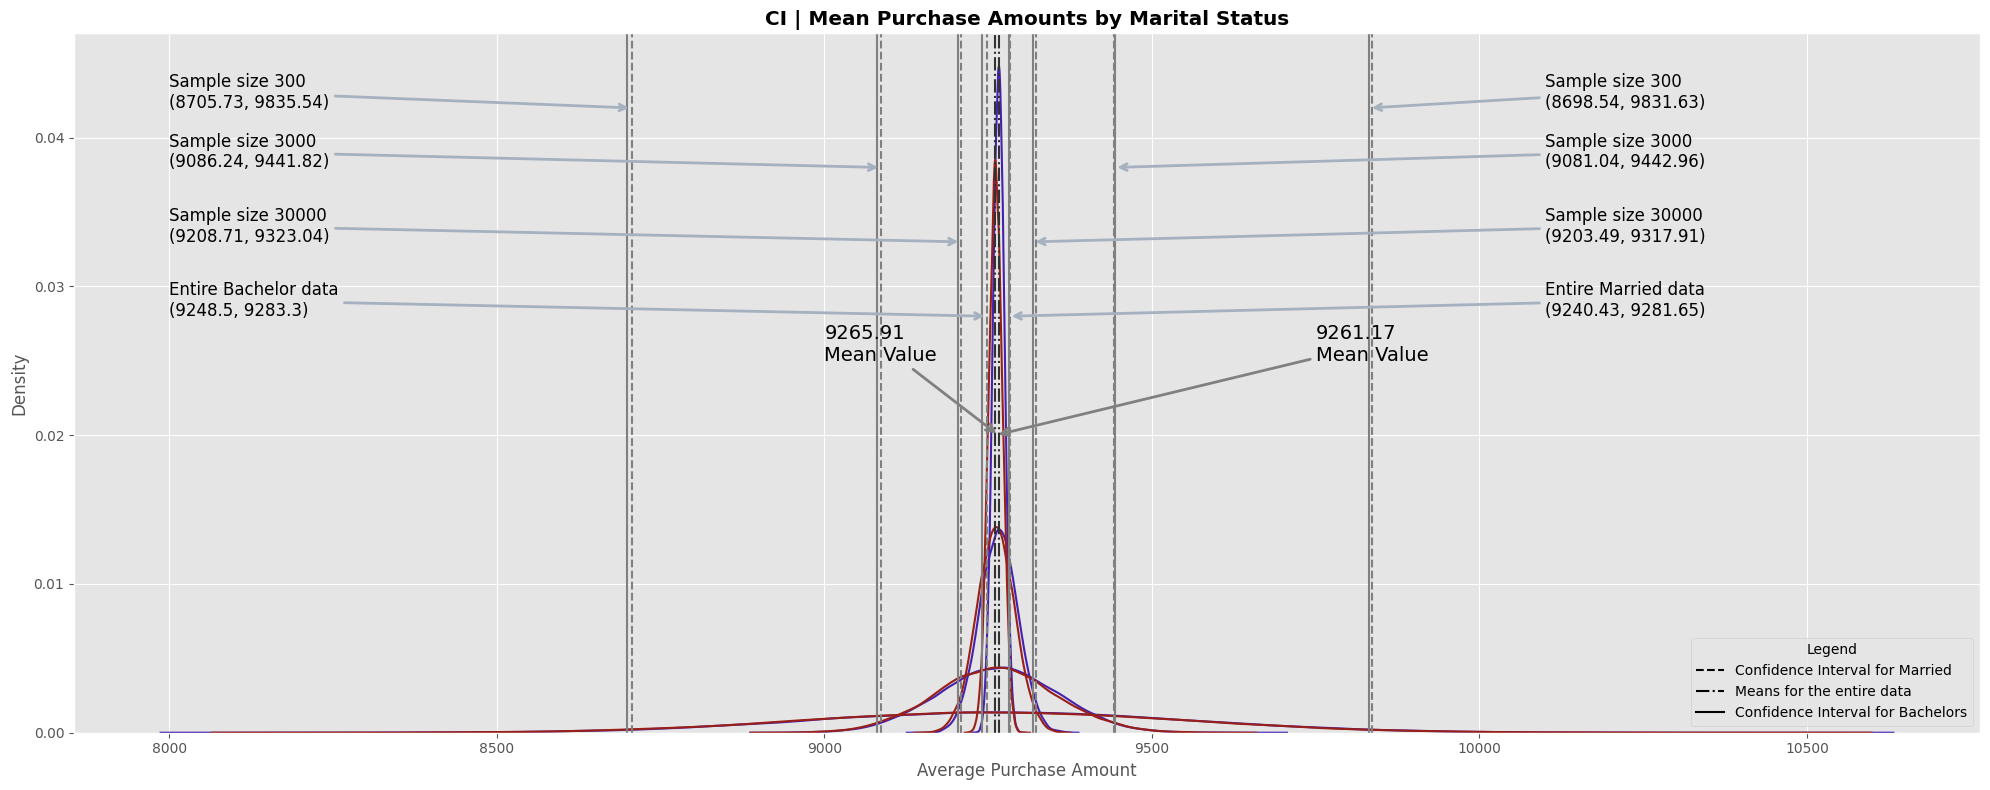

In [64]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(20, 8))

    # KDE plots
    sns.kdeplot(ci_bach_300[1], color='#4421af')
    sns.kdeplot(ci_bach_3000[1], color='#4421af')
    sns.kdeplot(ci_bach_30000[1], color='#4421af')
    sns.kdeplot(ci_bach_orig[1], color='#4421af')

    sns.kdeplot(ci_mar_300[1], color='#991f17')
    sns.kdeplot(ci_mar_3000[1], color='#991f17')
    sns.kdeplot(ci_mar_30000[1], color='#991f17')
    sns.kdeplot(ci_mar_orig[1], color='#991f17')

    # Vertical line for the mean
    plt.axvline(x=bach_mean, color='#313131', linestyle='-.')
    plt.axvline(x=mar_mean, color='#313131', linestyle='-.')

    # Drawing the actual means
    plt.annotate(f'{round(bach_mean, 2)}\nMean Value', xy=(bach_mean, 0.02), xytext=(9000, 0.025), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=14)
    plt.annotate(f'{round(mar_mean, 2)}\nMean Value', xy=(mar_mean, 0.02), xytext=(9750, 0.025), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=14)

    # Plotting the Confidence Intervals lines
    plt.axvline(x=ci_mar_300[0][0], color='grey')
    plt.axvline(x=ci_mar_300[0][1], color='grey')
    plt.axvline(x=ci_mar_3000[0][0], color='grey')
    plt.axvline(x=ci_mar_3000[0][1], color='grey')
    plt.axvline(x=ci_mar_30000[0][0], color='grey')
    plt.axvline(x=ci_mar_30000[0][1], color='grey')
    plt.axvline(x=ci_mar_orig[0][0], color='grey')
    plt.axvline(x=ci_mar_orig[0][1], color='grey')

    plt.axvline(x=ci_bach_300[0][0], color='grey', linestyle = '--')
    plt.axvline(x=ci_bach_300[0][1], color='grey', linestyle = '--')
    plt.axvline(x=ci_bach_3000[0][0], color='grey', linestyle = '--')
    plt.axvline(x=ci_bach_3000[0][1], color='grey', linestyle = '--')
    plt.axvline(x=ci_bach_30000[0][0], color='grey', linestyle = '--')
    plt.axvline(x=ci_bach_30000[0][1], color='grey', linestyle = '--')
    plt.axvline(x=ci_bach_orig[0][0], color='grey', linestyle = '--')
    plt.axvline(x=ci_bach_orig[0][1], color='grey', linestyle = '--')

    # Annotating the confidence intervals
    plt.annotate(f'Sample size 300\n{round(ci_bach_300[0][0],2),round(ci_bach_300[0][1],2)}', xy=(ci_bach_300[0][0], 0.042), xytext=(8000, 0.042), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)
    plt.annotate(f'Sample size 3000\n{round(ci_bach_3000[0][0],2),round(ci_bach_3000[0][1],2)}', xy=(ci_bach_3000[0][0], 0.038), xytext=(8000, 0.038), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)
    plt.annotate(f'Sample size 30000\n{round(ci_bach_30000[0][0],2),round(ci_bach_30000[0][1],2)}', xy=(ci_bach_30000[0][0], 0.033), xytext=(8000, 0.033), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)
    plt.annotate(f'Entire Bachelor data\n{round(ci_bach_orig[0][0],2),round(ci_bach_orig[0][1],2)}', xy=(ci_bach_orig[0][0], 0.028), xytext=(8000, 0.028), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)

    plt.annotate(f'Sample size 300\n{round(ci_mar_300[0][0],2),round(ci_mar_300[0][1],2)}', xy=(ci_mar_300[0][1], 0.042), xytext=(10100, 0.042), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)
    plt.annotate(f'Sample size 3000\n{round(ci_mar_3000[0][0],2),round(ci_mar_3000[0][1],2)}', xy=(ci_mar_3000[0][1], 0.038), xytext=(10100, 0.038), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)
    plt.annotate(f'Sample size 30000\n{round(ci_mar_30000[0][0],2),round(ci_mar_30000[0][1],2)}', xy=(ci_mar_30000[0][1], 0.033), xytext=(10100, 0.033), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)
    plt.annotate(f'Entire Married data\n{round(ci_mar_orig[0][0],2),round(ci_mar_orig[0][1],2)}', xy=(ci_mar_orig[0][1], 0.028), xytext=(10100, 0.028), arrowprops=dict(facecolor='#a5b1be', edgecolor = '#a5b1be',lw = 2, arrowstyle='->'), fontsize=12)

    # Creating custom legend elements
    legend_elements = [
        Line2D([0], [0], color='black', linestyle='--', label='Confidence Interval for Married'),
        Line2D([0], [0], color='black', linestyle='-.', label='Means for the entire data'),
        Line2D([0], [0], color='black', linestyle='-', label='Confidence Interval for Bachelors')
    ]

    # Title and legend
    plt.xlabel('Average Purchase Amount')
    plt.legend(handles=legend_elements, loc='lower right', title = 'Legend')
    plt.title('CI | Mean Purchase Amounts by Marital Status', weight='bold')
    plt.tight_layout()
    plt.show()


### ***How does Age affect the amount spent?***

In [65]:
# Filtering out Purchase amounts for different age groups from the original dataframe

age_0_17 = df[df['Age'] == '0-17']['Purchase']
age_18_25 = df[df['Age'] == '18-25']['Purchase']
age_26_35 = df[df['Age'] == '26-35']['Purchase']
age_36_45 = df[df['Age'] == '36-45']['Purchase']
age_46_50 = df[df['Age'] == '46-50']['Purchase']
age_51_55 = df[df['Age'] == '51-55']['Purchase']
age_55plus = df[df['Age'] == '55+']['Purchase']

In [66]:
# Creating a list of previously obtained dataframes for iteration
age_cat_df = [age_0_17, age_18_25, age_26_35, age_36_45, age_46_50, age_51_55, age_55plus]
# Creating list of unique Age group values in the original dataframe
age_cat_keys = ['0-17','18-25' , '26-35', '36-45', '46-50', '51-55', '55+']

#### *Age v Mean Purchase Amt | Sample size : Entire Age data*

In [67]:
# Creating an empty dict to store the returns from 'bootstrap_ci' data, wtih their respective Age group.
ci_age_cat_dict = {('ci_age_'+ key) : None for key in age_cat_keys}

# Calculating 95% CI for original sample sizes, i.e. entire age group data

for cat, key in zip(age_cat_df, ci_age_cat_dict.keys()):
  ci_age_cat_dict[key] = bootstrap_ci(cat, len(cat))

for ci_age_cat_key, age_cat_key in zip(ci_age_cat_dict.keys(), age_cat_keys):
  print(f"The 95% Confidence Interval for the {age_cat_key} age group is {round(ci_age_cat_dict[ci_age_cat_key][0][0], 2), round(ci_age_cat_dict[ci_age_cat_key][0][1], 2)}")

The 95% Confidence Interval for the 0-17 age group is (8852.94, 9014.71)
The 95% Confidence Interval for the 18-25 age group is (9138.23, 9201.21)
The 95% Confidence Interval for the 26-35 age group is (9231.55, 9273.6)
The 95% Confidence Interval for the 36-45 age group is (9301.71, 9361.1)
The 95% Confidence Interval for the 46-50 age group is (9162.96, 9253.81)
The 95% Confidence Interval for the 51-55 age group is (9485.08, 9585.95)
The 95% Confidence Interval for the 55+ age group is (9269.22, 9403.41)


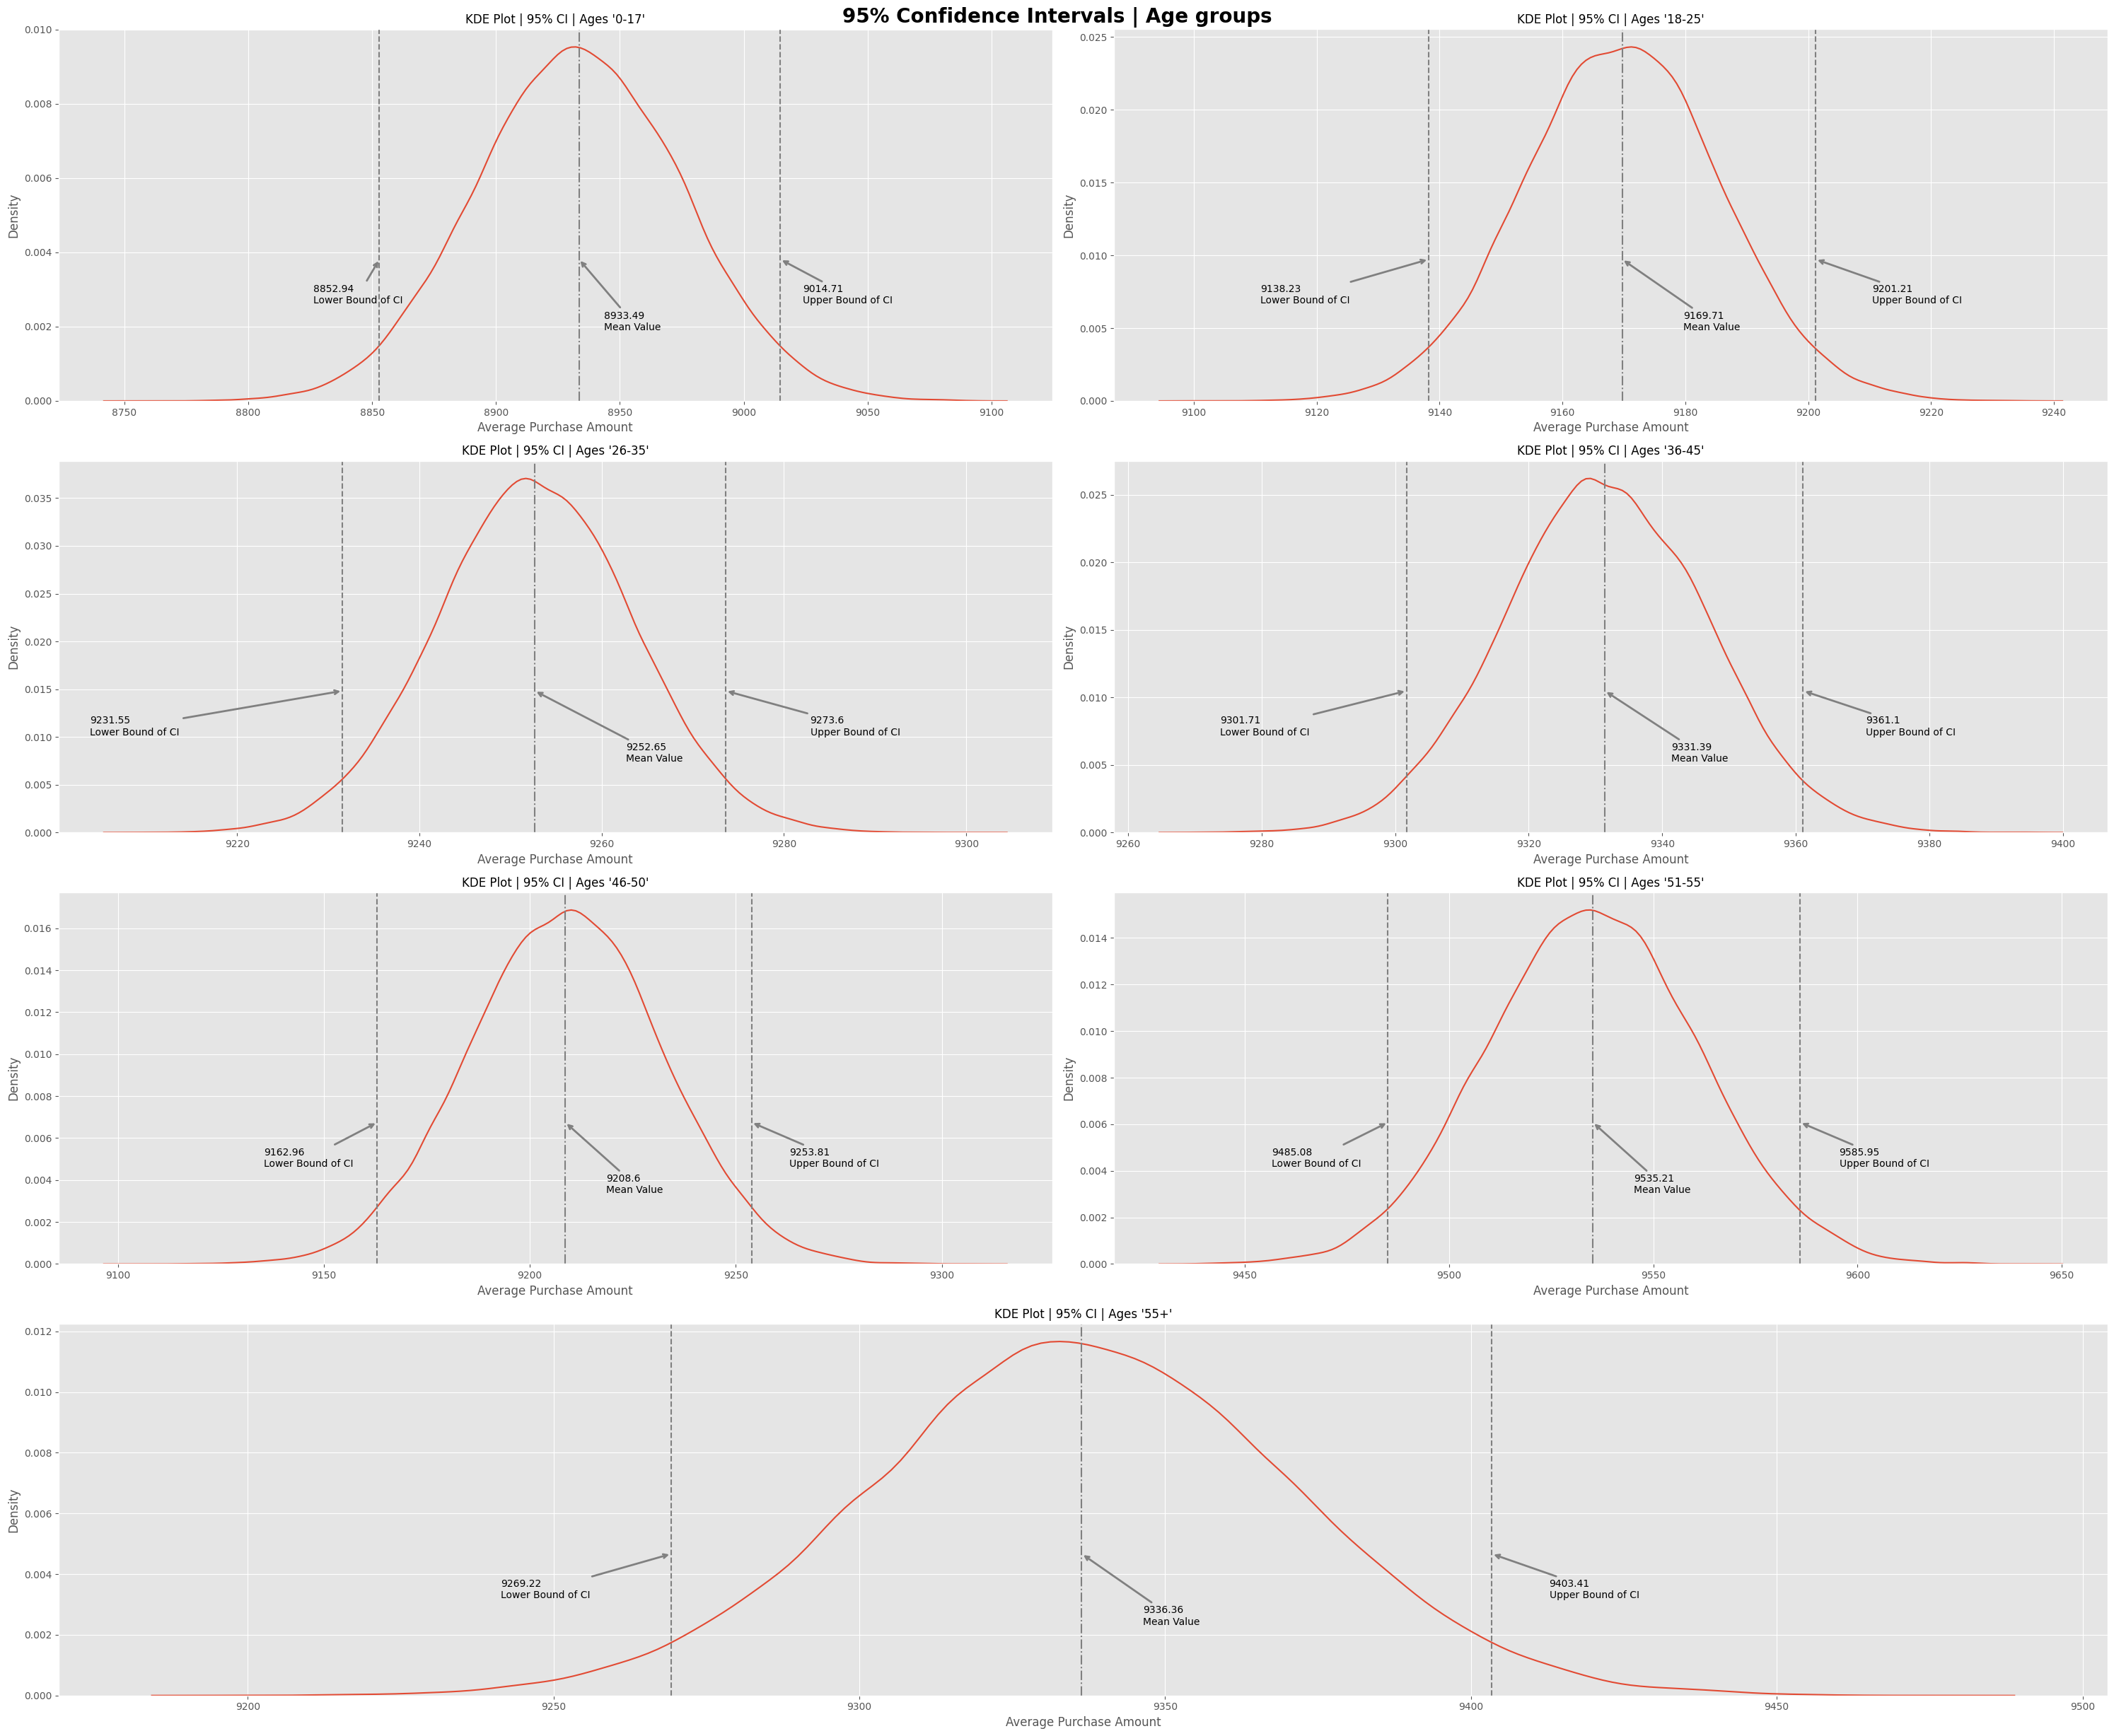

In [68]:
with plt.style.context("ggplot"):
  # Create a figure with a custom grid
  fig = plt.figure(figsize=(30, 25))
  gs = GridSpec(4, 6, figure=fig)

  # Create subplots
  ax1 = fig.add_subplot(gs[0, :3])  # Top-left
  ax2 = fig.add_subplot(gs[0, 3:])  # Top-right
  ax3 = fig.add_subplot(gs[1, :3])  # Middle-left
  ax4 = fig.add_subplot(gs[1, 3:])  # Middle-center
  ax5 = fig.add_subplot(gs[2, :3])  # Middle-right
  ax6 = fig.add_subplot(gs[2, 3:])  # Penultimate
  ax7 = fig.add_subplot(gs[3, :])  # Bottom

  # Creating a list of ax objects for iteration
  spaces = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

  # Looping through the final results in our dict to plot CIs & curves
  for group, key, space in zip(age_cat_keys, ci_age_cat_dict.keys(), spaces):
    sns.kdeplot(ci_age_cat_dict[key][1], ax = space)
    space.set_title(f"KDE Plot | 95% CI | Ages '{group}'", weight = 'book', fontsize = 12)
    space.axvline(x=np.mean(ci_age_cat_dict[key][1]), color='grey', linestyle = '-.')
    space.axvline(x=ci_age_cat_dict[key][0][0], color='grey', linestyle = '--')
    space.axvline(x=ci_age_cat_dict[key][0][1], color='grey', linestyle = '--')
    space.set_xlabel('Average Purchase Amount')

    # Collecting the Y axis data to appropriately annotate on the plots
    line = space.get_lines()[0]
    y_data = line.get_ydata()
    # Annotating the Confidence Intervals and the Means of the Sample data
    space.annotate(f'{round(np.mean(ci_age_cat_dict[key][1]), 2)}\nMean Value', xy=(np.mean(ci_age_cat_dict[key][1]), y_data.max()*0.4), xytext=(np.mean(ci_age_cat_dict[key][1])+10, y_data.max()*0.2), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=10)
    space.annotate(f'{round(ci_age_cat_dict[key][0][0],2)}\nLower Bound of CI', xy=(ci_age_cat_dict[key][0][0], y_data.max()*0.4), xytext=(ci_age_cat_dict[key][0][0]*0.997, y_data.max()*0.275), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=10)
    space.annotate(f'{round(np.mean(ci_age_cat_dict[key][0][1]), 2)}\nUpper Bound of CI', xy=(ci_age_cat_dict[key][0][1], y_data.max()*0.4), xytext=(ci_age_cat_dict[key][0][1]*1.001, y_data.max()*0.275), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=10)

  plt.suptitle('95% Confidence Intervals | Age groups', weight = 'bold', size = 20)
  plt.tight_layout()
  plt.show()

#### *Age v Mean Purchase Amt | Sample size : 300*

In [69]:
# Creating an empty dict to store the returns from 'bootstrap_ci' data, wtih their respective Age group.
ci_age_cat_300 = {('ci_age_'+ key) : None for key in age_cat_keys}

# Calculating 95% CI for original sample sizes, i.e. entire age group data

for cat, key in zip(age_cat_df, ci_age_cat_300.keys()):
  ci_age_cat_300[key] = bootstrap_ci(cat, 300)

print('Sample size : 300')

for ci_age_cat_key, age_cat_key in zip(ci_age_cat_300.keys(), age_cat_keys):
  print(f"The 95% Confidence Interval for the {age_cat_key} age group is {round(ci_age_cat_300[ci_age_cat_key][0][0], 2), round(ci_age_cat_300[ci_age_cat_key][0][1], 2)}")

Sample size : 300
The 95% Confidence Interval for the 0-17 age group is (8355.02, 9506.61)
The 95% Confidence Interval for the 18-25 age group is (8596.58, 9738.44)
The 95% Confidence Interval for the 26-35 age group is (8686.85, 9829.07)
The 95% Confidence Interval for the 36-45 age group is (8770.9, 9905.75)
The 95% Confidence Interval for the 46-50 age group is (8647.27, 9777.67)
The 95% Confidence Interval for the 51-55 age group is (8966.9, 10116.77)
The 95% Confidence Interval for the 55+ age group is (8766.75, 9919.06)


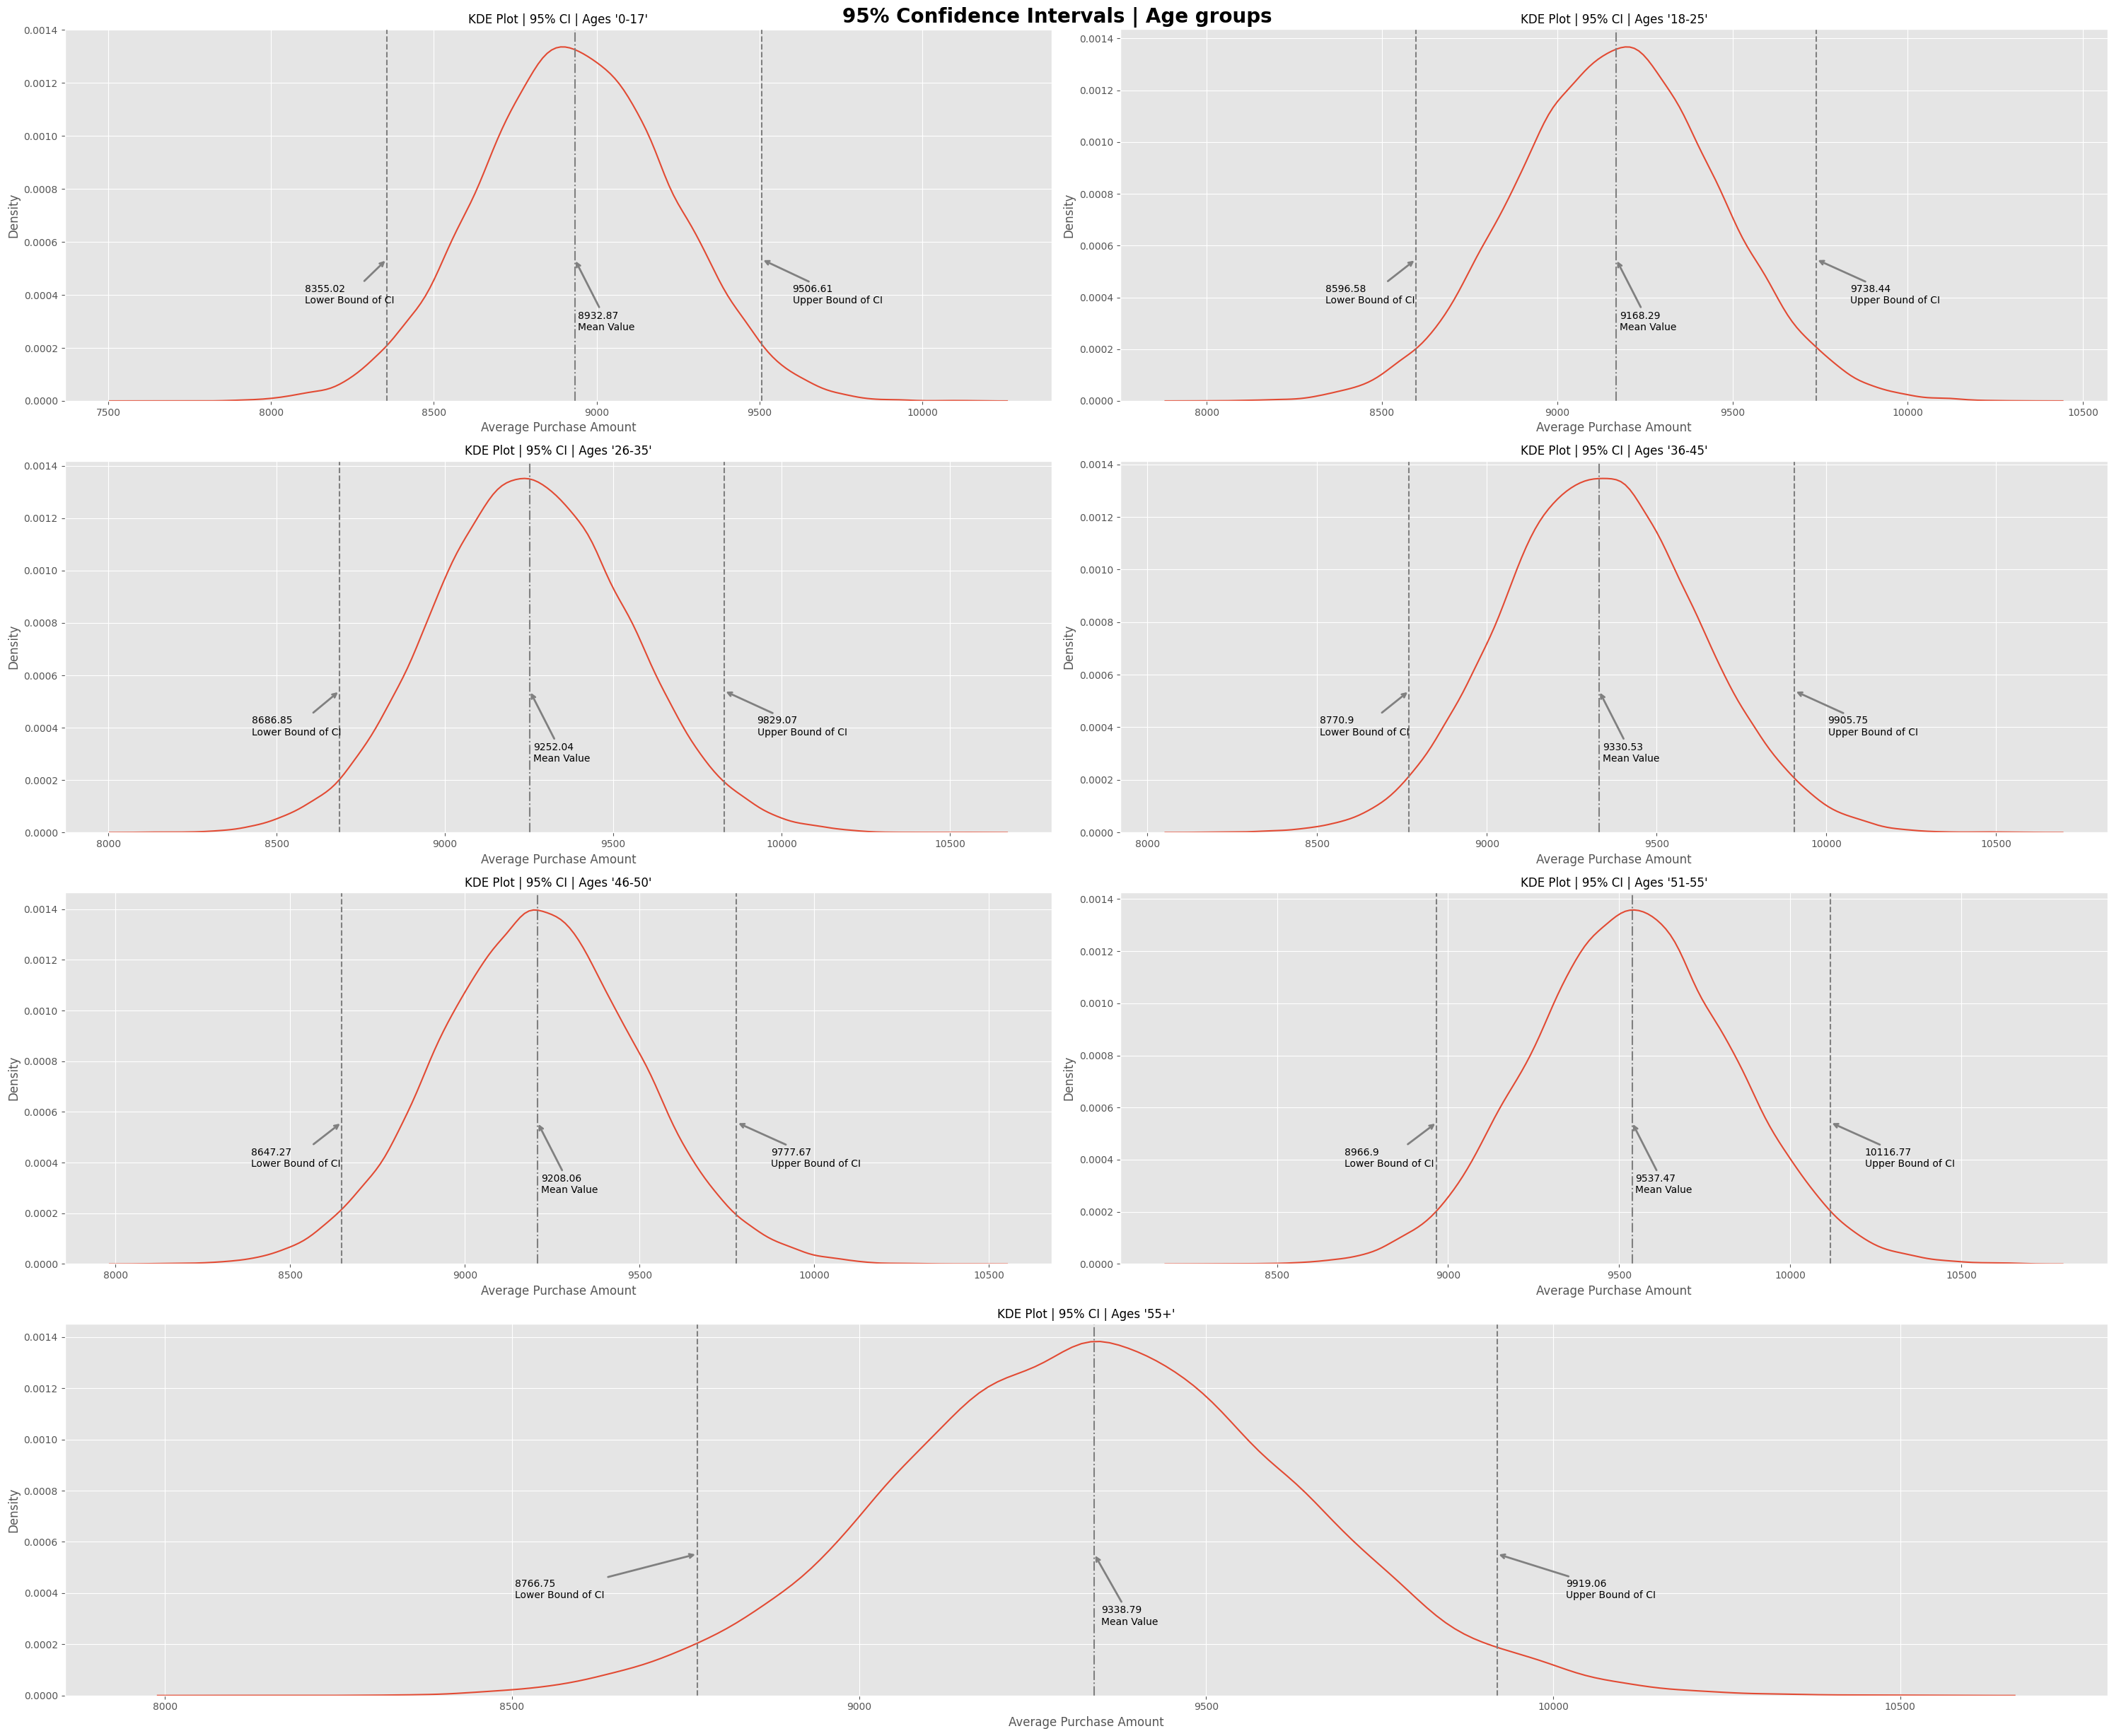

In [70]:
with plt.style.context("ggplot"):
  # Create a figure with a custom grid
  fig = plt.figure(figsize=(30, 25))
  gs = GridSpec(4, 6, figure=fig)

  # Create subplots
  ax1 = fig.add_subplot(gs[0, :3])  # Top-left
  ax2 = fig.add_subplot(gs[0, 3:])  # Top-right
  ax3 = fig.add_subplot(gs[1, :3])  # Middle-left
  ax4 = fig.add_subplot(gs[1, 3:])  # Middle-center
  ax5 = fig.add_subplot(gs[2, :3])  # Middle-right
  ax6 = fig.add_subplot(gs[2, 3:])  # Penultimate
  ax7 = fig.add_subplot(gs[3, :])  # Bottom

  # Creating a list of ax objects for iteration
  spaces = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

  # Looping through the final results in our dict to plot CIs & curves
  for group, key, space in zip(age_cat_keys, ci_age_cat_300.keys(), spaces):
    sns.kdeplot(ci_age_cat_300[key][1], ax = space)
    space.set_title(f"KDE Plot | 95% CI | Ages '{group}'", weight = 'book', fontsize = 12)
    space.axvline(x=np.mean(ci_age_cat_300[key][1]), color='grey', linestyle = '-.')
    space.axvline(x=ci_age_cat_300[key][0][0], color='grey', linestyle = '--')
    space.axvline(x=ci_age_cat_300[key][0][1], color='grey', linestyle = '--')
    space.set_xlabel('Average Purchase Amount')

    # Collecting the Y axis data to appropriately annotate on the plots
    line = space.get_lines()[0]
    y_data = line.get_ydata()
    # Annotating the Confidence Intervals and the Means of the Sample data
    space.annotate(f'{round(np.mean(ci_age_cat_300[key][1]), 2)}\nMean Value', xy=(np.mean(ci_age_cat_300[key][1]), y_data.max()*0.4), xytext=(np.mean(ci_age_cat_300[key][1])+10, y_data.max()*0.2), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=10)
    space.annotate(f'{round(ci_age_cat_300[key][0][0],2)}\nLower Bound of CI', xy=(ci_age_cat_300[key][0][0], y_data.max()*0.4), xytext=(ci_age_cat_300[key][0][0]*0.97, y_data.max()*0.275), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=10)
    space.annotate(f'{round(np.mean(ci_age_cat_300[key][0][1]), 2)}\nUpper Bound of CI', xy=(ci_age_cat_300[key][0][1], y_data.max()*0.4), xytext=(ci_age_cat_300[key][0][1]*1.01, y_data.max()*0.275), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=10)

  plt.suptitle('95% Confidence Intervals | Age groups', weight = 'bold', size = 20)
  plt.tight_layout()
  plt.show()

#### *Age v Mean Purchase Amt | Sample size : 3000*

In [71]:
# Creating an empty dict to store the returns from 'bootstrap_ci' data, wtih their respective Age group.
ci_age_cat_3000 = {('ci_age_'+ key) : None for key in age_cat_keys}

# Calculating 95% CI for original sample sizes, i.e. entire age group data

for cat, key in zip(age_cat_df, ci_age_cat_3000.keys()):
  ci_age_cat_3000[key] = bootstrap_ci(cat, 300)

print('Sample size : 300')

for ci_age_cat_key, age_cat_key in zip(ci_age_cat_3000.keys(), age_cat_keys):
  print(f"The 95% Confidence Interval for the {age_cat_key} age group is {round(ci_age_cat_3000[ci_age_cat_key][0][0], 2), round(ci_age_cat_3000[ci_age_cat_key][0][1], 2)}")

Sample size : 300
The 95% Confidence Interval for the 0-17 age group is (8352.44, 9513.56)
The 95% Confidence Interval for the 18-25 age group is (8611.58, 9741.98)
The 95% Confidence Interval for the 26-35 age group is (8690.33, 9826.85)
The 95% Confidence Interval for the 36-45 age group is (8762.91, 9899.18)
The 95% Confidence Interval for the 46-50 age group is (8652.51, 9782.2)
The 95% Confidence Interval for the 51-55 age group is (8965.91, 10111.05)
The 95% Confidence Interval for the 55+ age group is (8779.73, 9902.72)


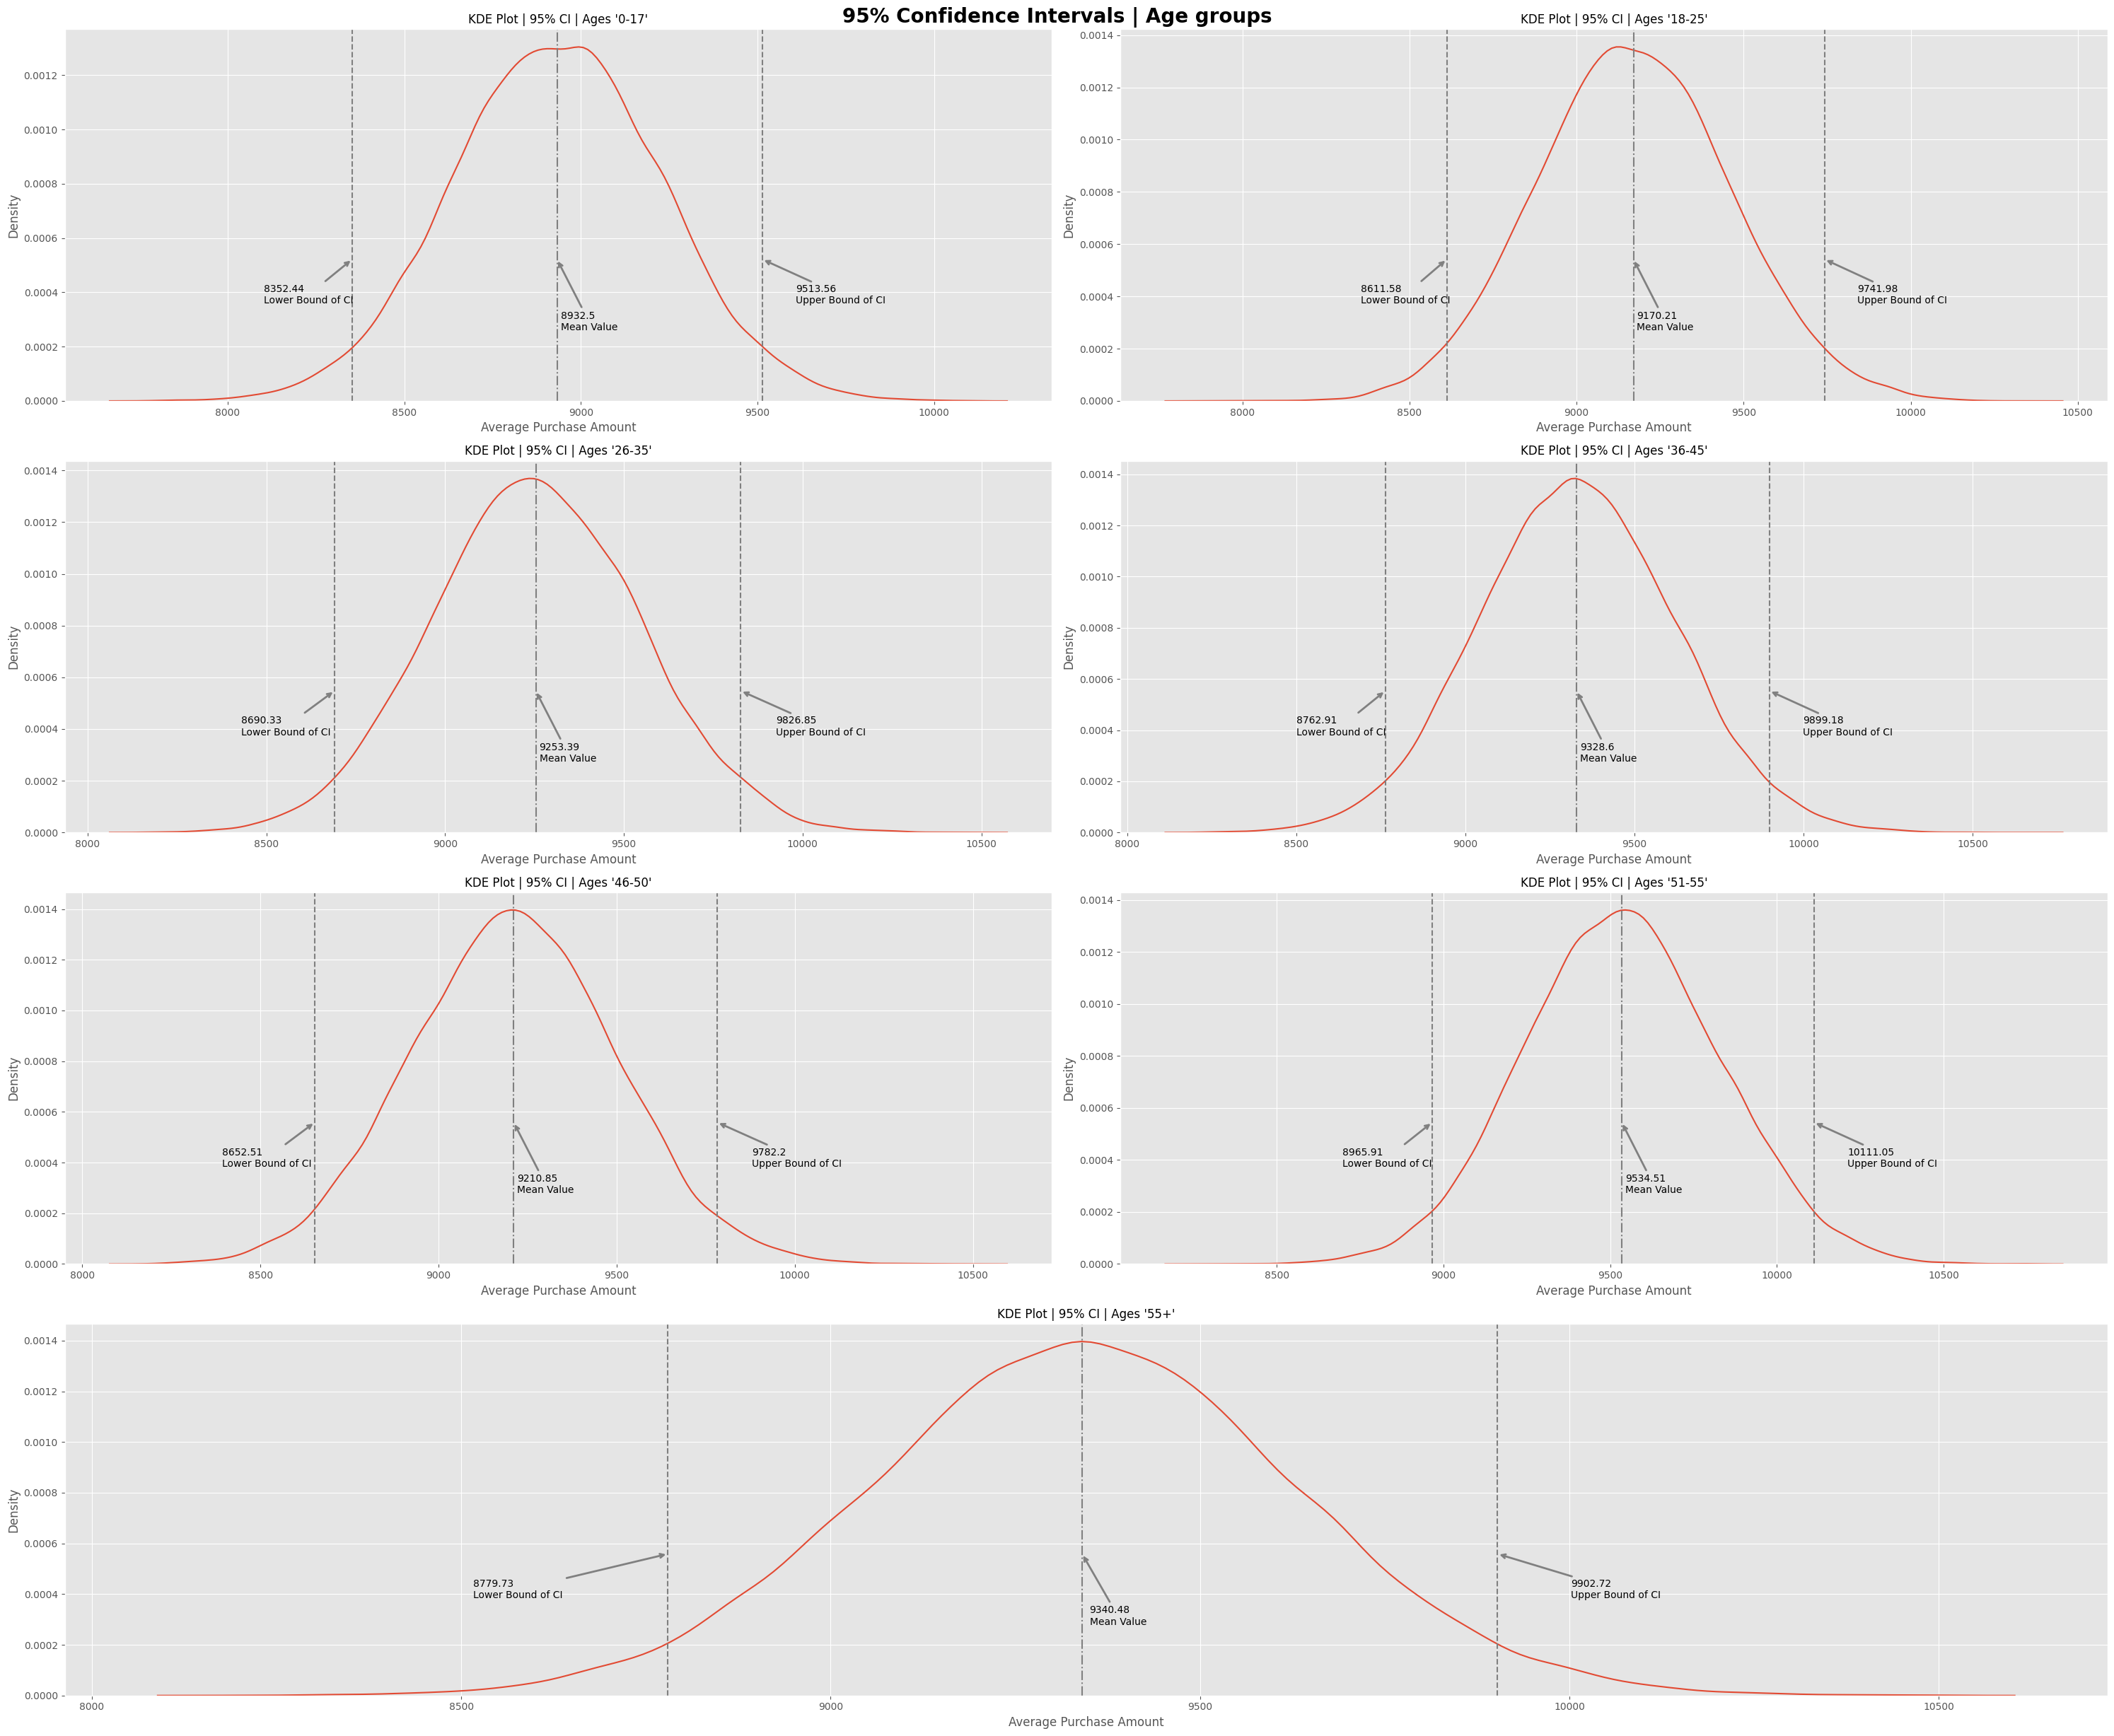

In [72]:
with plt.style.context("ggplot"):
  # Create a figure with a custom grid
  fig = plt.figure(figsize=(30, 25))
  gs = GridSpec(4, 6, figure=fig)

  # Create subplots
  ax1 = fig.add_subplot(gs[0, :3])  # Top-left
  ax2 = fig.add_subplot(gs[0, 3:])  # Top-right
  ax3 = fig.add_subplot(gs[1, :3])  # Middle-left
  ax4 = fig.add_subplot(gs[1, 3:])  # Middle-center
  ax5 = fig.add_subplot(gs[2, :3])  # Middle-right
  ax6 = fig.add_subplot(gs[2, 3:])  # Penultimate
  ax7 = fig.add_subplot(gs[3, :])  # Bottom

  # Creating a list of ax objects for iteration
  spaces = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

  # Looping through the final results in our dict to plot CIs & curves
  for group, key, space in zip(age_cat_keys, ci_age_cat_3000.keys(), spaces):
    sns.kdeplot(ci_age_cat_3000[key][1], ax = space)
    space.set_title(f"KDE Plot | 95% CI | Ages '{group}'", weight = 'book', fontsize = 12)
    space.axvline(x=np.mean(ci_age_cat_3000[key][1]), color='grey', linestyle = '-.')
    space.axvline(x=ci_age_cat_3000[key][0][0], color='grey', linestyle = '--')
    space.axvline(x=ci_age_cat_3000[key][0][1], color='grey', linestyle = '--')
    space.set_xlabel('Average Purchase Amount')

    # Collecting the Y axis data to appropriately annotate on the plots
    line = space.get_lines()[0]
    y_data = line.get_ydata()
    # Annotating the Confidence Intervals and the Means of the Sample data
    space.annotate(f'{round(np.mean(ci_age_cat_3000[key][1]), 2)}\nMean Value', xy=(np.mean(ci_age_cat_3000[key][1]), y_data.max()*0.4), xytext=(np.mean(ci_age_cat_3000[key][1])+10, y_data.max()*0.2), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=10)
    space.annotate(f'{round(ci_age_cat_3000[key][0][0],2)}\nLower Bound of CI', xy=(ci_age_cat_3000[key][0][0], y_data.max()*0.4), xytext=(ci_age_cat_3000[key][0][0]*0.97, y_data.max()*0.275), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=10)
    space.annotate(f'{round(np.mean(ci_age_cat_3000[key][0][1]), 2)}\nUpper Bound of CI', xy=(ci_age_cat_3000[key][0][1], y_data.max()*0.4), xytext=(ci_age_cat_3000[key][0][1]*1.01, y_data.max()*0.275), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=10)

  plt.suptitle('95% Confidence Intervals | Age groups', weight = 'bold', size = 20)
  plt.tight_layout()
  plt.show()

#### *Age v Mean Purchase Amt | Sample size : 30000*

In [73]:
# Creating an empty dict to store the returns from 'bootstrap_ci' data, wtih their respective Age group.
ci_age_cat_30000 = {('ci_age_'+ key) : None for key in age_cat_keys}

# Calculating 95% CI for original sample sizes, i.e. entire age group data

for cat, key in zip(age_cat_df, ci_age_cat_30000.keys()):
  ci_age_cat_30000[key] = bootstrap_ci(cat, 300)

print('Sample size : 300')

for ci_age_cat_key, age_cat_key in zip(ci_age_cat_30000.keys(), age_cat_keys):
  print(f"The 95% Confidence Interval for the {age_cat_key} age group is {round(ci_age_cat_30000[ci_age_cat_key][0][0], 2), round(ci_age_cat_30000[ci_age_cat_key][0][1], 2)}")

Sample size : 300
The 95% Confidence Interval for the 0-17 age group is (8362.07, 9512.36)
The 95% Confidence Interval for the 18-25 age group is (8601.96, 9747.76)
The 95% Confidence Interval for the 26-35 age group is (8703.79, 9833.33)
The 95% Confidence Interval for the 36-45 age group is (8776.74, 9910.27)
The 95% Confidence Interval for the 46-50 age group is (8646.68, 9782.12)
The 95% Confidence Interval for the 51-55 age group is (8969.54, 10113.88)
The 95% Confidence Interval for the 55+ age group is (8771.77, 9910.0)


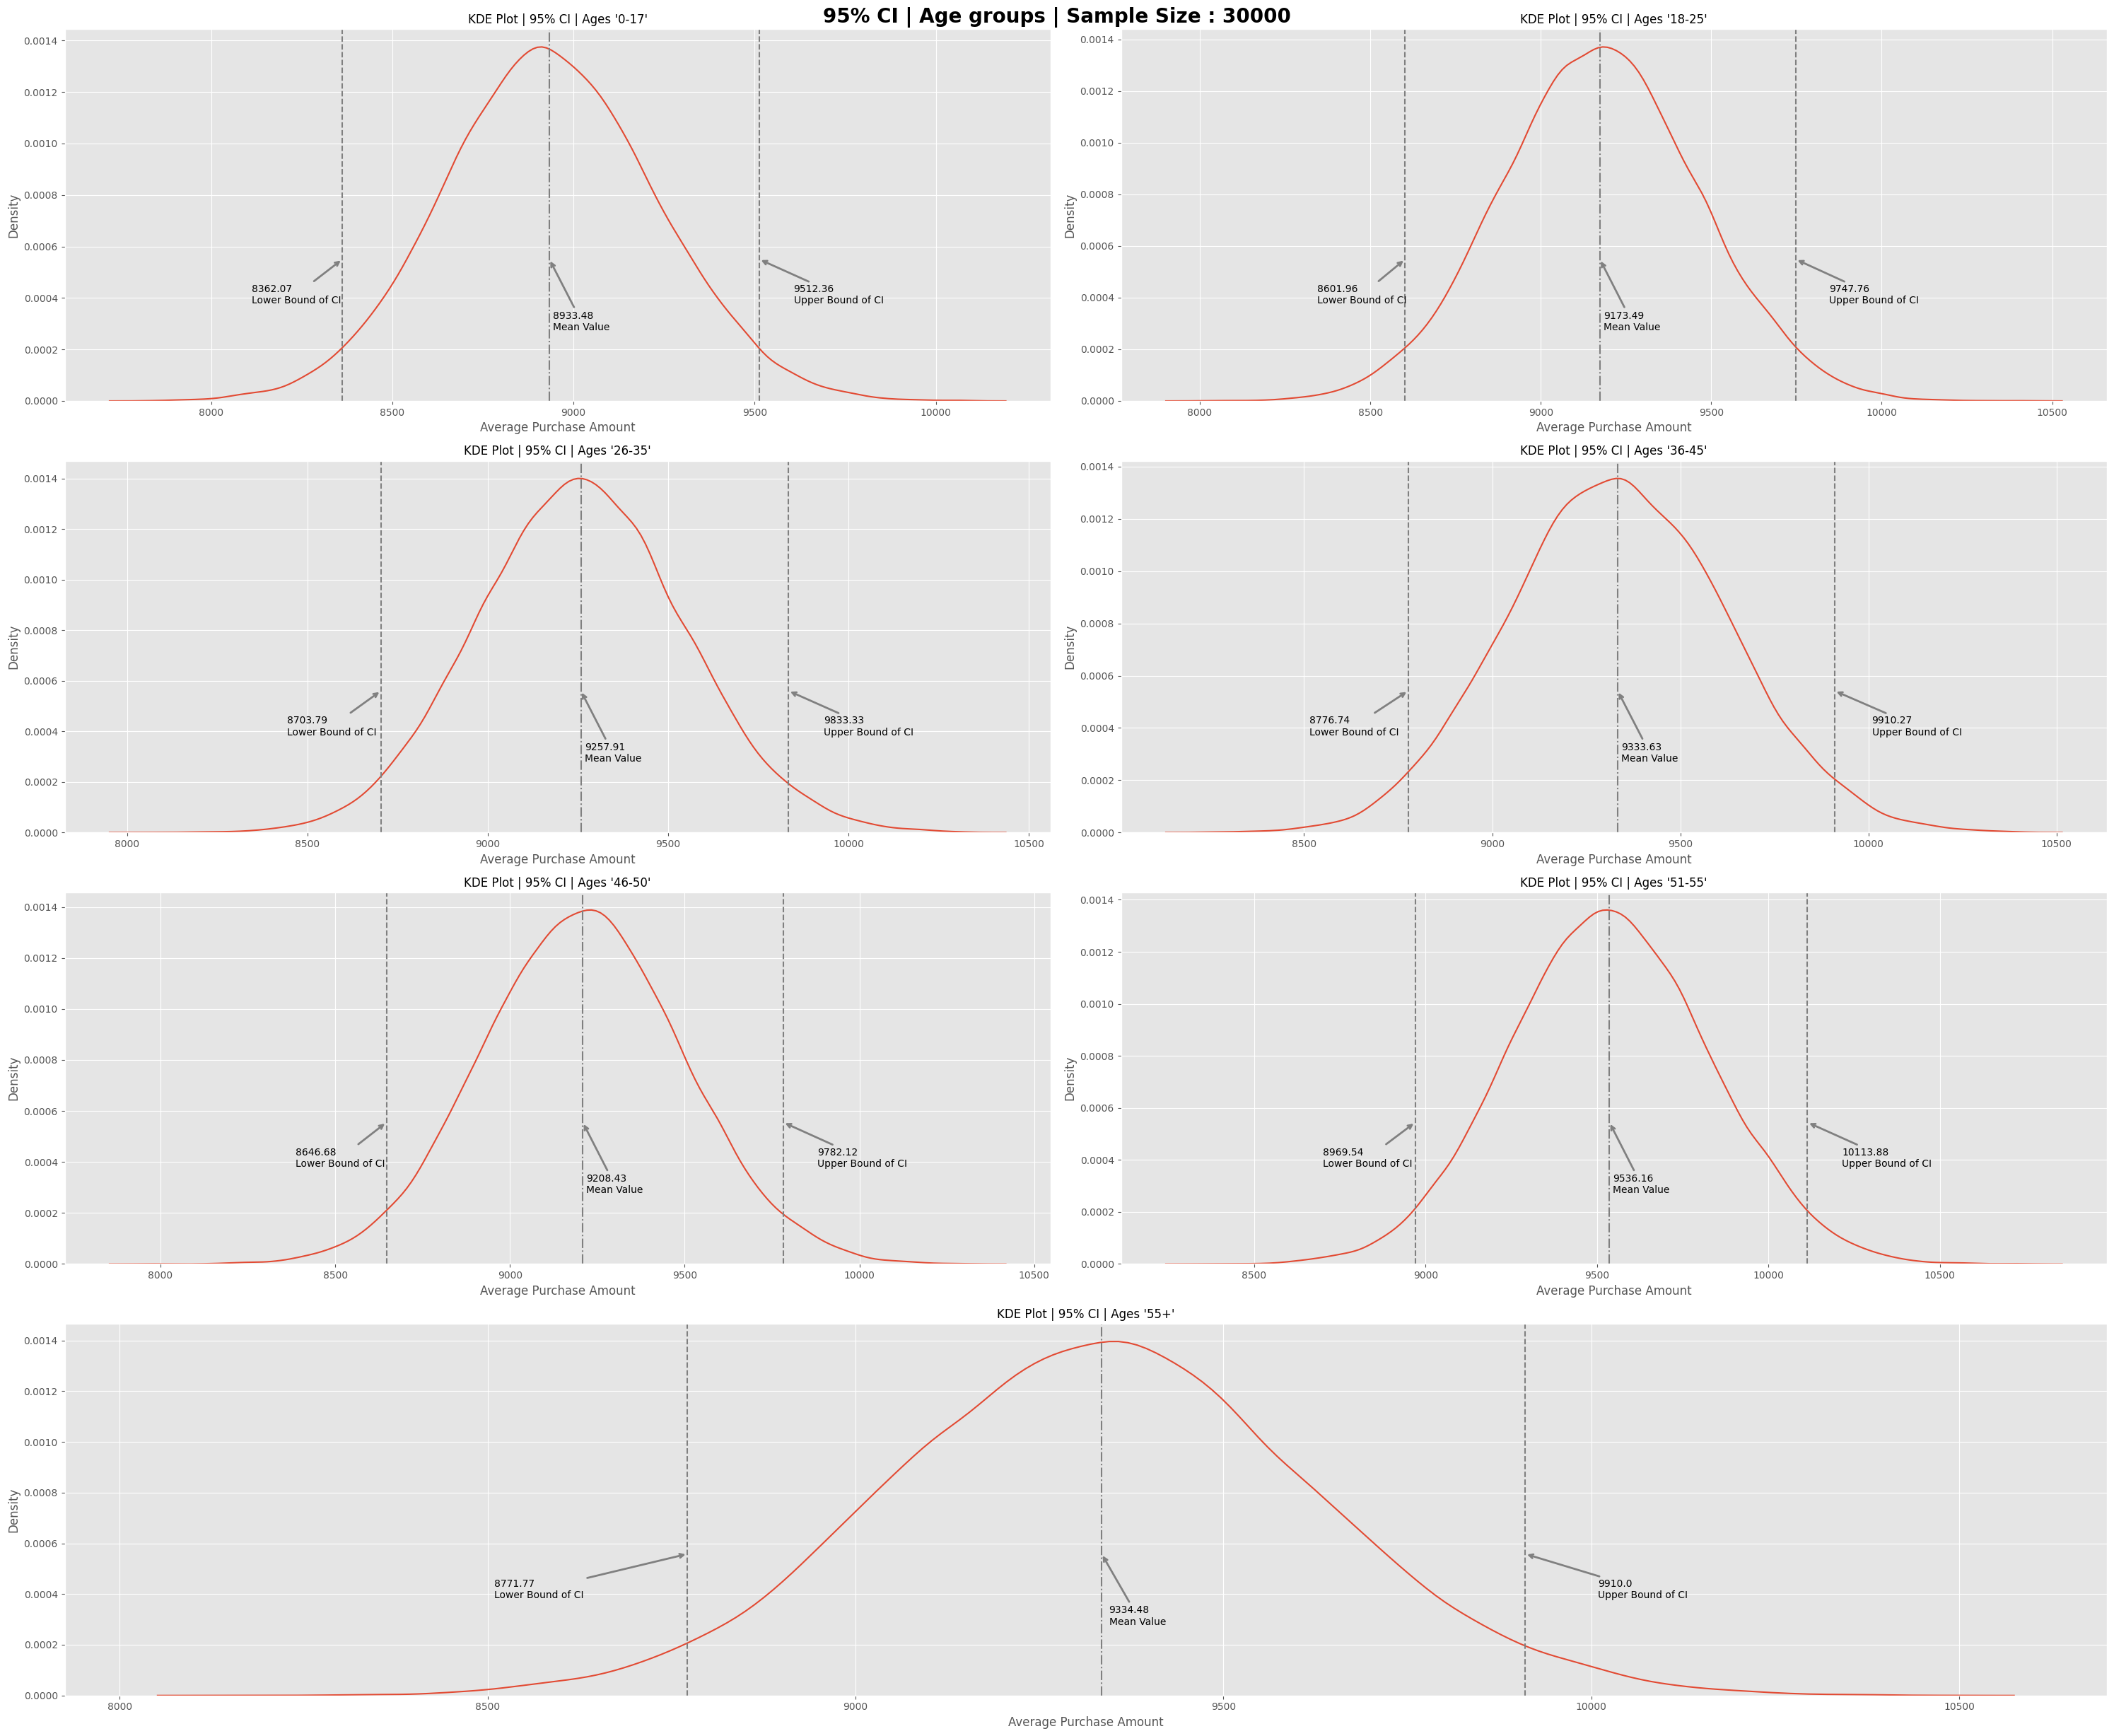

In [74]:
with plt.style.context("ggplot"):
  # Create a figure with a custom grid
  fig = plt.figure(figsize=(30, 25))
  gs = GridSpec(4, 6, figure=fig)

  # Create subplots
  ax1 = fig.add_subplot(gs[0, :3])  # Top-left
  ax2 = fig.add_subplot(gs[0, 3:])  # Top-right
  ax3 = fig.add_subplot(gs[1, :3])  # Middle-left
  ax4 = fig.add_subplot(gs[1, 3:])  # Middle-center
  ax5 = fig.add_subplot(gs[2, :3])  # Middle-right
  ax6 = fig.add_subplot(gs[2, 3:])  # Penultimate
  ax7 = fig.add_subplot(gs[3, :])  # Bottom

  # Creating a list of ax objects for iteration
  spaces = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

  # Looping through the final results in our dict to plot CIs & curves
  for group, key, space in zip(age_cat_keys, ci_age_cat_30000.keys(), spaces):
    sns.kdeplot(ci_age_cat_30000[key][1], ax = space)
    space.set_title(f"KDE Plot | 95% CI | Ages '{group}'", weight = 'book', fontsize = 12)
    space.axvline(x=np.mean(ci_age_cat_30000[key][1]), color='grey', linestyle = '-.')
    space.axvline(x=ci_age_cat_30000[key][0][0], color='grey', linestyle = '--')
    space.axvline(x=ci_age_cat_30000[key][0][1], color='grey', linestyle = '--')
    space.set_xlabel('Average Purchase Amount')

    # Collecting the Y axis data to appropriately annotate on the plots
    line = space.get_lines()[0]
    y_data = line.get_ydata()
    # Annotating the Confidence Intervals and the Means of the Sample data
    space.annotate(f'{round(np.mean(ci_age_cat_30000[key][1]), 2)}\nMean Value', xy=(np.mean(ci_age_cat_30000[key][1]), y_data.max()*0.4), xytext=(np.mean(ci_age_cat_30000[key][1])+10, y_data.max()*0.2), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=10)
    space.annotate(f'{round(ci_age_cat_30000[key][0][0],2)}\nLower Bound of CI', xy=(ci_age_cat_30000[key][0][0], y_data.max()*0.4), xytext=(ci_age_cat_30000[key][0][0]*0.97, y_data.max()*0.275), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=10)
    space.annotate(f'{round(np.mean(ci_age_cat_30000[key][0][1]), 2)}\nUpper Bound of CI', xy=(ci_age_cat_30000[key][0][1], y_data.max()*0.4), xytext=(ci_age_cat_30000[key][0][1]*1.01, y_data.max()*0.275), arrowprops=dict(facecolor='grey', edgecolor = 'grey',lw = 2, arrowstyle='->'), fontsize=10)

  plt.suptitle('95% CI | Age groups | Sample Size : 30000', weight = 'bold', size = 20)
  plt.tight_layout()
  plt.show()

### **_Insights :_**

- Gender vs the Mean Purchase Amount
  - The mean purchase value for males 9437.50 is noticeably higher than for females 8734.50, a difference of about 703.
  - The non-overlapping confidence intervals indicate that this difference is statistically significant.
  - Male customers, on average, spend more per purchase than female customers at this mall.

- Marital Status vs the Mean Purchase Amount
  - The mean purchase values for bachelors 9265.85 and married customers 9261.13 are very close, with a difference of only about 4.72.
  - The overlapping confidence intervals suggest that there is no statistically significant difference in spending between these two groups.
  - The similarity in spending patterns indicates that the mall appeals equally to both bachelors and married customers.
  - This suggests that the product mix and shopping experience are likely suitable for both demographics.

- Age vs the Mean Purchase Amount
  - Walmart customer purchase data analysis reveals distinct spending patterns across age groups. The 51-55 age group has the highest mean purchase amount 9534.89, while the 0-17 group has the lowest 8933.08.
  - Spending generally increases with age, with a slight dip in the 46-50 group.
  - Most age groups show statistically significant differences in spending, except for the 36-45 and 55+ groups, which have similar patterns.

## **Recommendations :**

- Age-based strategies:

  - Create targeted marketing campaigns for the highest-spending age groups (51-55 and 55+).
  - Develop loyalty programs that cater to different age segments, with special perks for high-spending older customers.
  - Implement initiatives to increase spending among younger customers (0-17 and 18-25), such as student discounts or partnerships with youth-oriented brands.

- Gender-specific approach:

  - Optimize product mix and store layout to appeal to both genders, focusing on increasing the average purchase value of female customers.
  - Develop gender-specific marketing campaigns and promotions to address the spending gap between male and female customers.
  - Train staff to understand and cater to different shopping behaviors of male and female customers.

- Inclusive marketing:

  - Create campaigns that appeal to both bachelors and married customers, as their spending patterns are similar.
  - Focus on lifestyle and interest-based marketing rather than solely on marital status.

- Product diversification:

  - Expand product ranges to appeal to all identified customer segments.
  - Introduce high-value items targeted at high-spending groups (males, 51-55 age group) while also offering affordable options for other segments.

- Feedback loop:

  - Regularly collect and analyze customer feedback to continuously improve offerings and services.
  - Use insights to adapt strategies quickly to changing customer preferences.

- Accessibility improvements:

  - Ensure stores are easily accessible to all age groups, including older customers who show higher spending patterns.
  - Implement features like rest areas, clear signage, and assistance services.

- Bundle offers:

  - Create attractive product bundles that appeal to different customer segments, encouraging higher purchase amounts.


- Loyalty program refinement:

  - Develop a tiered loyalty program that rewards higher spending and encourages customers to move up tiers.
  - Offer personalized rewards based on customer preferences and shopping history.